Jinglin Zhang z5405642

# 1. Data Handling and Preparation

## 1.1 Import Python Packages and Load the Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/dataset_ML/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/dataset_ML


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import math
import joblib
from tabulate import tabulate
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.regularizers import l2
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
from typing_extensions import final
from sklearn.metrics import mean_squared_error, mean_absolute_error

seed = 42
np.random.seed(seed)
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

In [3]:
file_name = "AirQualityUCI _ Students.xlsx"
df = pd.read_excel(file_name)  # 8358 rows × 15 columns
df

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  \
0    2004-03-10  18:00:00     2.6      1360.00       150  11.881723   
1    2004-03-10  19:00:00     2.0      1292.25       112   9.397165   
2    2004-03-10  20:00:00     2.2      1402.00        88   8.997817   
3    2004-03-10  21:00:00     2.2      1375.50        80   9.228796   
4    2004-03-10  22:00:00     1.6      1272.25        51   6.518224   
...         ...       ...     ...          ...       ...        ...   
8353 2005-04-01  10:00:00     1.0       947.75      -200   3.525377   
8354 2005-04-01  11:00:00     1.0       938.50      -200   3.576895   
8355 2005-04-01  12:00:00     1.1       924.50      -200   4.045717   
8356 2005-04-01  13:00:00     1.3       923.75      -200   4.519882   
8357 2005-04-01  14:00:00     1.0       890.75      -200   3.276734   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
0           1045.50    166.0       1056.25    113.0       1692.00   
1            954.75    103.0       1173.75     92.0       1558.75   
2            939.25    131.0       1140.00    114.0       1554.50   
3            948.25    172.0       1092.00    122.0       1583.75   
4            835.50    131.0       1205.00    116.0       1490.00   
...             ...      ...           ...      ...           ...   
8353         683.75    180.0        851.00    119.9       1010.50   
8354         686.75    197.1        869.75    122.9        980.50   
8355         713.25    172.0        853.00    114.9        956.75   
8356         738.75    183.6        833.75    122.2        966.00   
8357         669.00    159.9        922.50    110.6        910.50   

      PT08.S5(O3)       T         RH        AH  
0         1267.50  13.600  48.875001  0.757754  
1          972.25  13.300  47.700000  0.725487  
2         1074.00  11.900  53.975000  0.750239  
3         1203.25  11.000  60.000000  0.786713  
4         1110.00  11.150  59.575001  0.788794  
...           ...     ...        ...       ...  
8353       599.00  16.450  40.775000  0.757020  
8354       549.50  18.925  33.775001  0.731210  
8355       518.00  19.175  29.475000  0.648005  
8356       540.50  19.925  26.300000  0.605405  
8357       456.25  19.200  26.950000  0.593404  

[8358 rows x 15 columns]

In [4]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8358 entries, 0 to 8357
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           8358 non-null   datetime64[ns]
 1   Time           8358 non-null   object        
 2   CO(GT)         8358 non-null   float64       
 3   PT08.S1(CO)    8358 non-null   float64       
 4   NMHC(GT)       8358 non-null   int64         
 5   C6H6(GT)       8358 non-null   float64       
 6   PT08.S2(NMHC)  8358 non-null   float64       
 7   NOx(GT)        8358 non-null   float64       
 8   PT08.S3(NOx)   8358 non-null   float64       
 9   NO2(GT)        8358 non-null   float64       
 10  PT08.S4(NO2)   8358 non-null   float64       
 11  PT08.S5(O3)    8358 non-null   float64       
 12  T              8358 non-null   float64       
 13  RH             8358 non-null   float64       
 14  AH             8358 non-null   float64       
dtypes: datetime64[ns](1),

(8358, 15)

In [5]:
data_describe = df.describe()
data_describe

Date       CO(GT)  PT08.S1(CO)     NMHC(GT)  \
count                           8358  8358.000000  8358.000000  8358.000000   
mean   2004-09-20 04:16:42.727925376   -36.187928  1038.533411  -158.119167   
min              2004-03-10 00:00:00  -200.000000  -200.000000  -200.000000   
25%              2004-06-17 00:00:00     0.500000   915.062500  -200.000000   
50%              2004-09-21 00:00:00     1.500000  1048.500000  -200.000000   
75%              2004-12-27 00:00:00     2.600000  1215.687500  -200.000000   
max              2005-04-01 00:00:00    11.900000  2007.750000  1189.000000   
std                              NaN    79.260156   338.349674   141.931963   

          C6H6(GT)  PT08.S2(NMHC)      NOx(GT)  PT08.S3(NOx)      NO2(GT)  \
count  8358.000000    8358.000000  8358.000000   8358.000000  8358.000000   
mean      0.894268     889.323901   162.607933    790.043631    53.912228   
min    -200.000000    -200.000000  -200.000000   -200.000000  -200.000000   
25%       3.968875     709.000000    45.000000    634.250000    49.000000   
50%       7.826424     892.000000   136.000000    793.000000    95.000000   
75%      13.636091    1104.750000   282.000000    958.687500   132.000000   
max      63.741476    2214.000000  1479.000000   2682.750000   339.700000   
std      43.609487     350.473599   260.322621    327.590979   130.150259   

       PT08.S4(NO2)  PT08.S5(O3)            T           RH           AH  
count   8358.000000  8358.000000  8358.000000  8358.000000  8358.000000  
mean    1382.696877   968.419987     8.713360    38.201273    -7.780588  
min     -200.000000  -200.000000  -200.000000  -200.000000  -200.000000  
25%     1177.500000   692.062500    10.450000    33.974999     0.675253  
50%     1442.500000   940.125000    17.225000    48.137500     0.971383  
75%     1658.187500  1251.750000    24.075000    61.593750     1.307486  
max     2775.000000  2522.750000    44.600000    87.174999     2.231036  
std      479.299713   464.837162    45.516939    53.678637    41.139234

## 1.2 variables over time

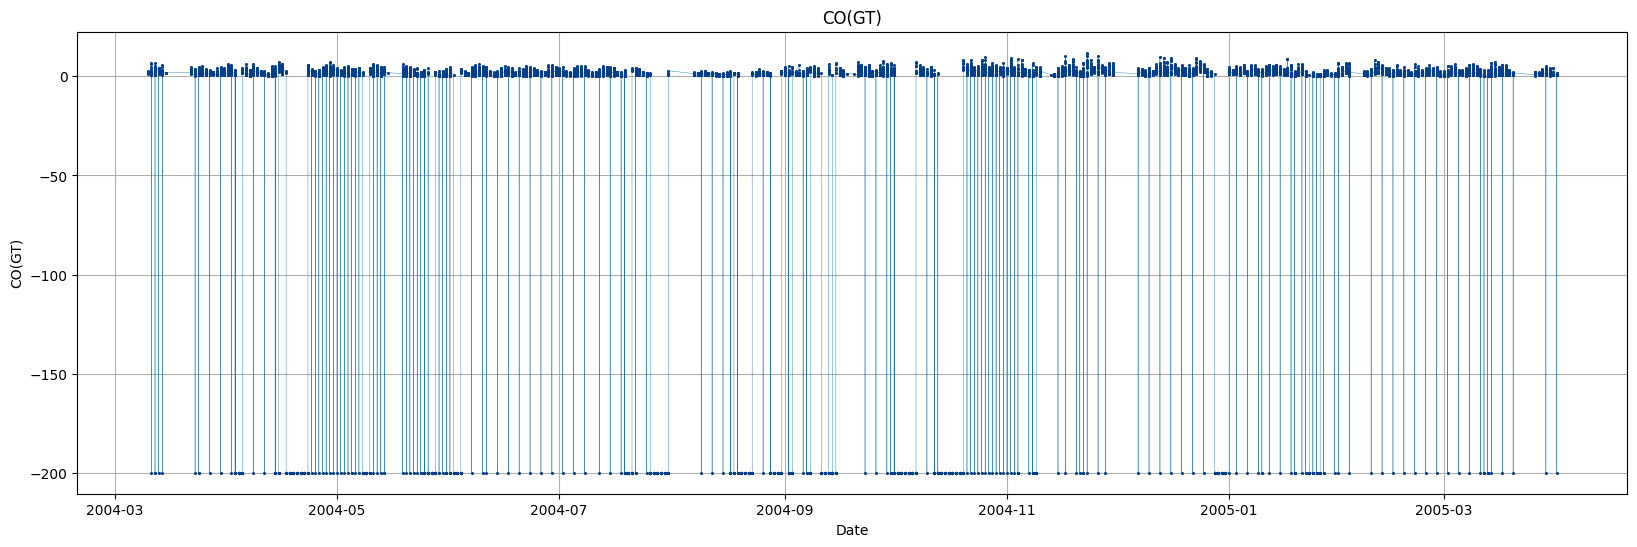

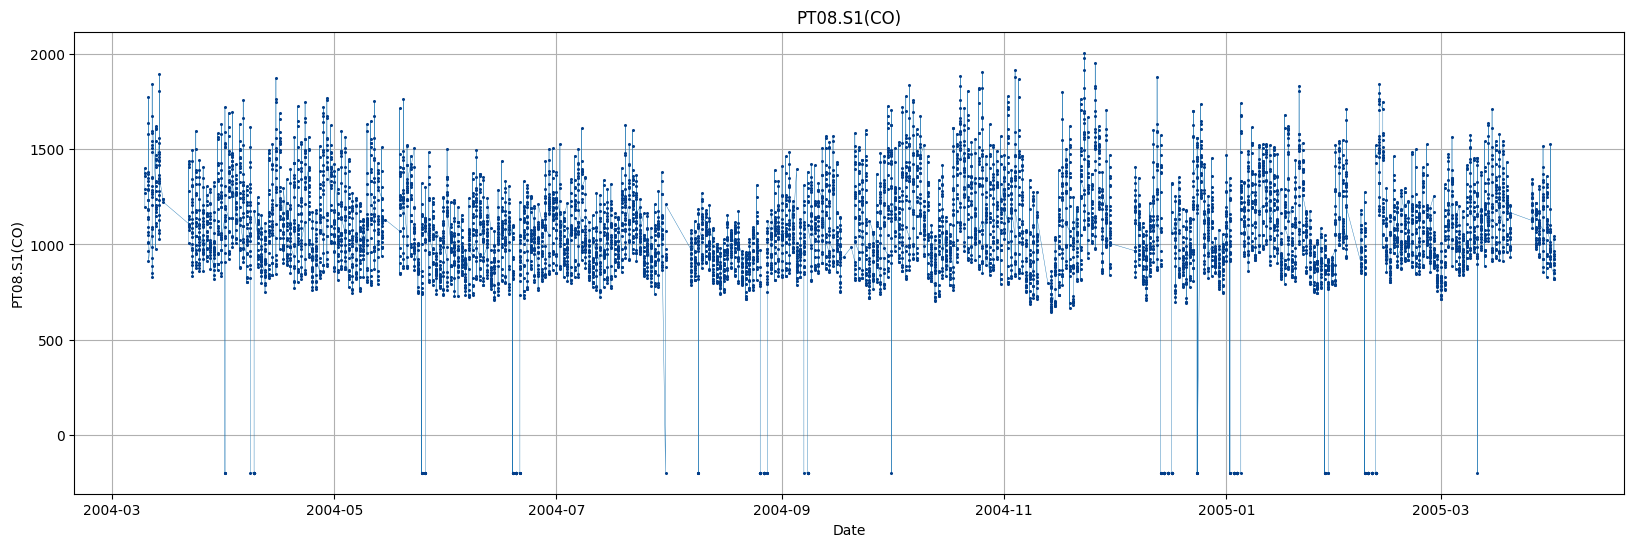

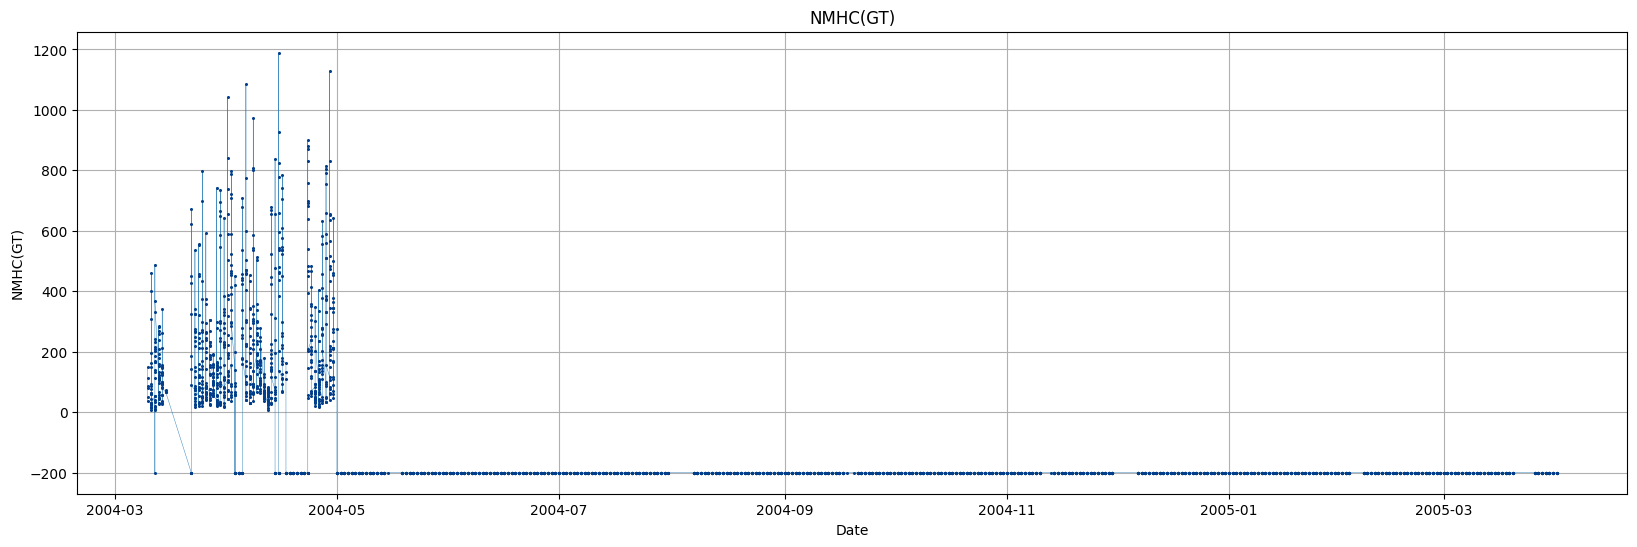

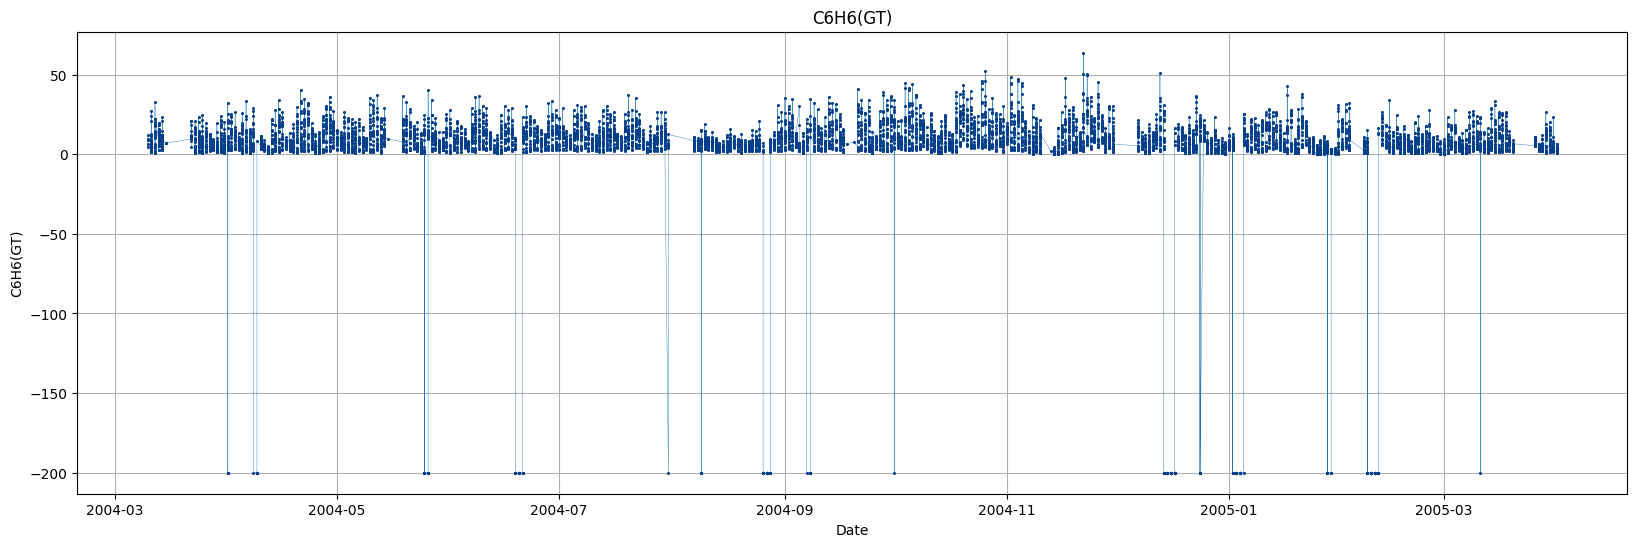

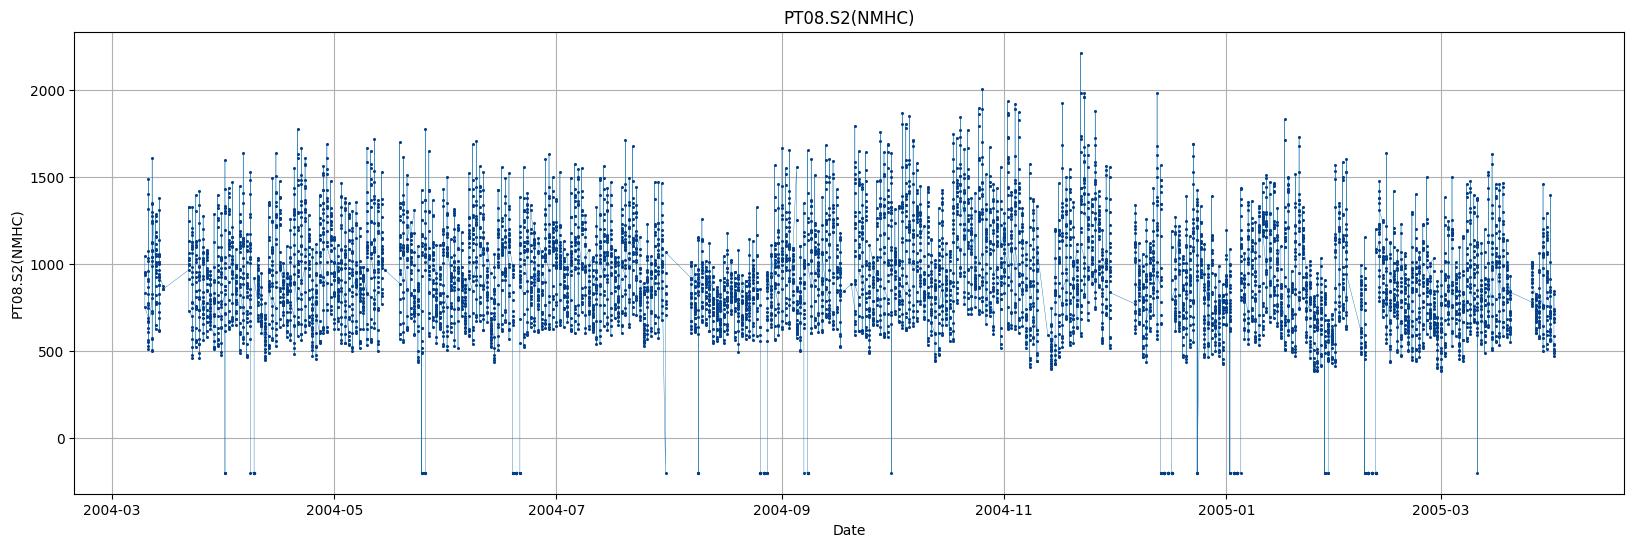

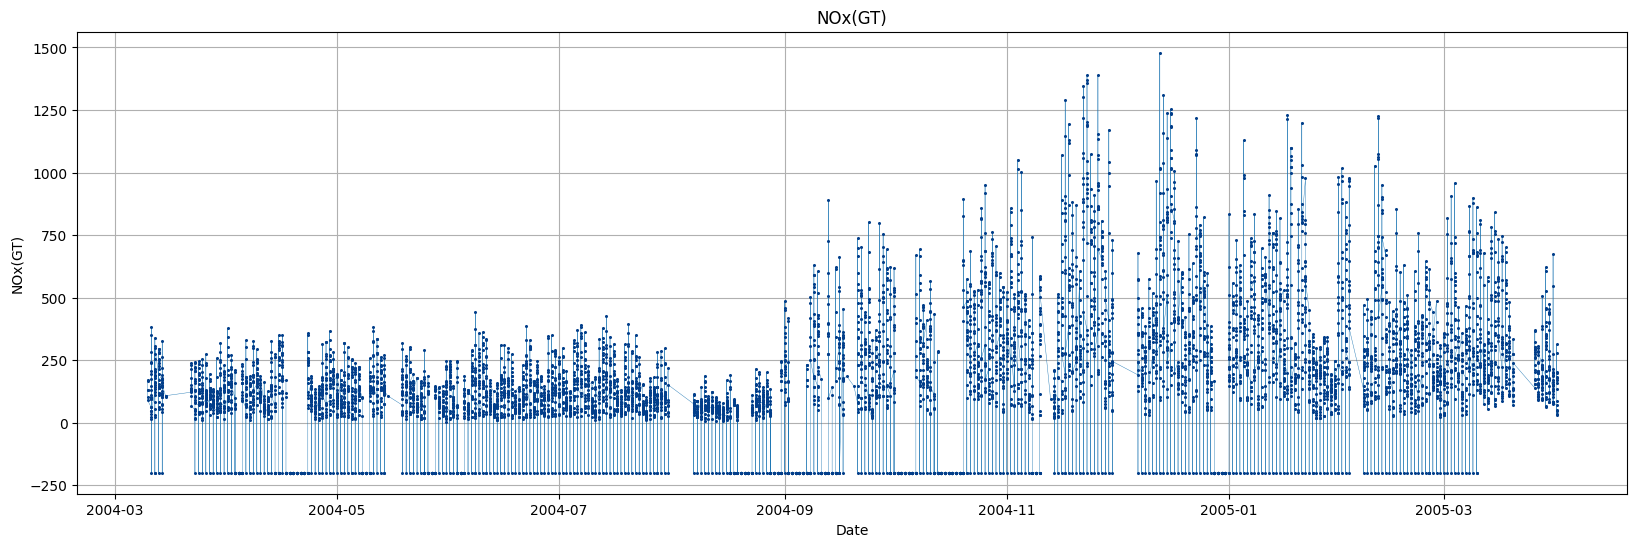

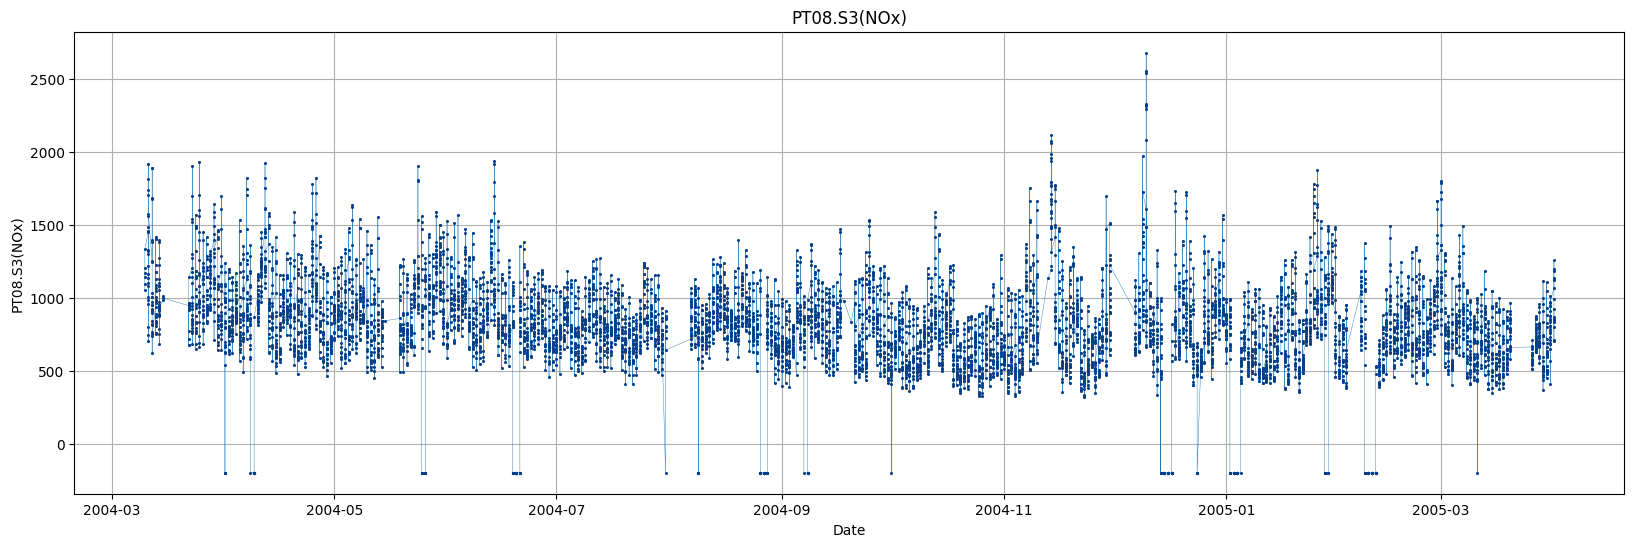

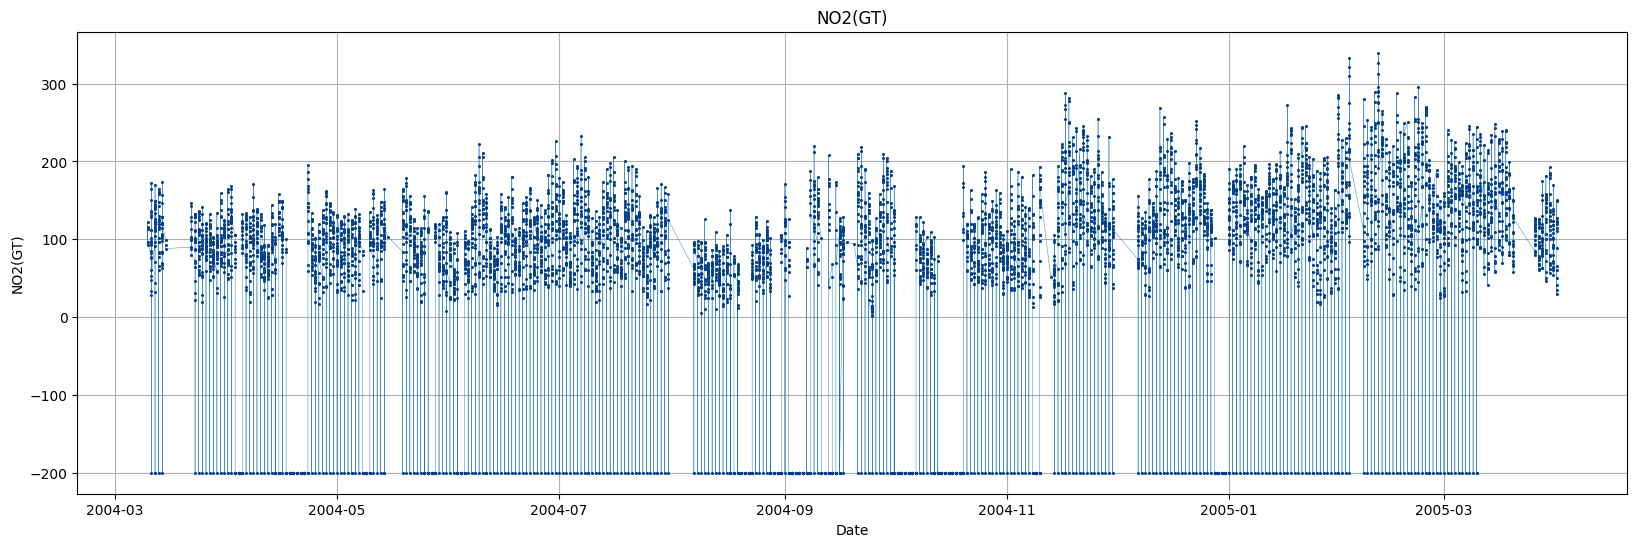

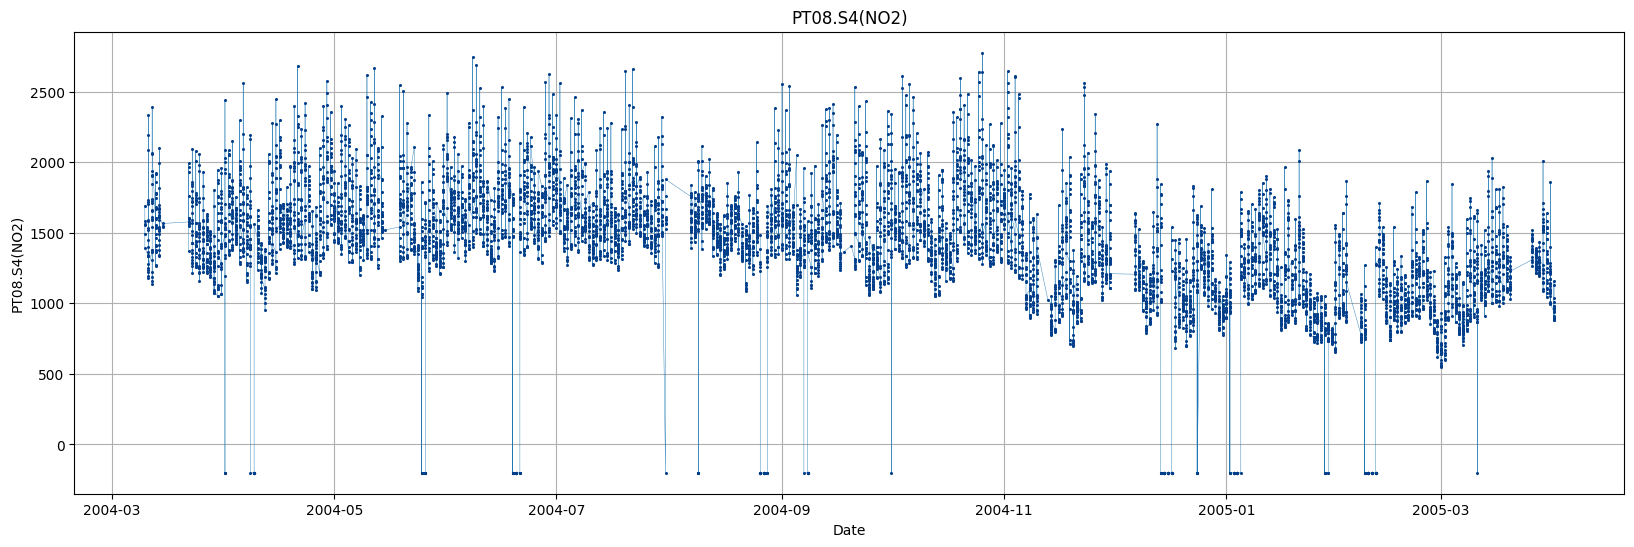

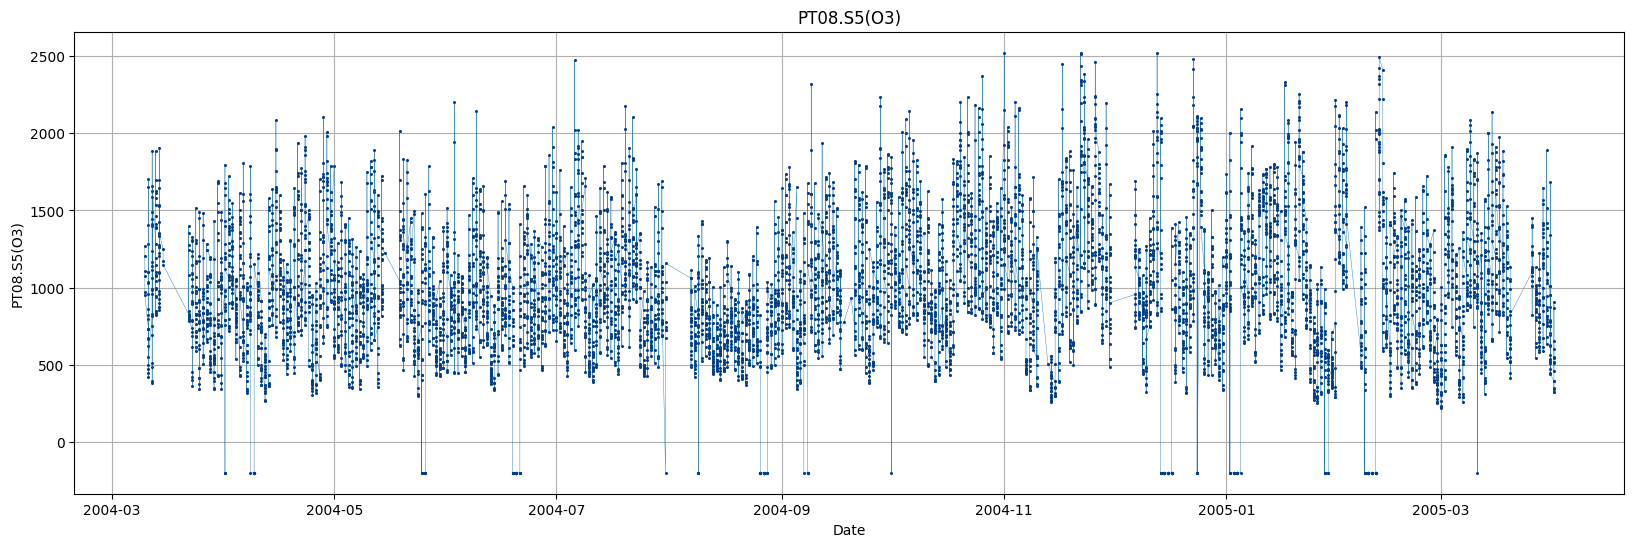

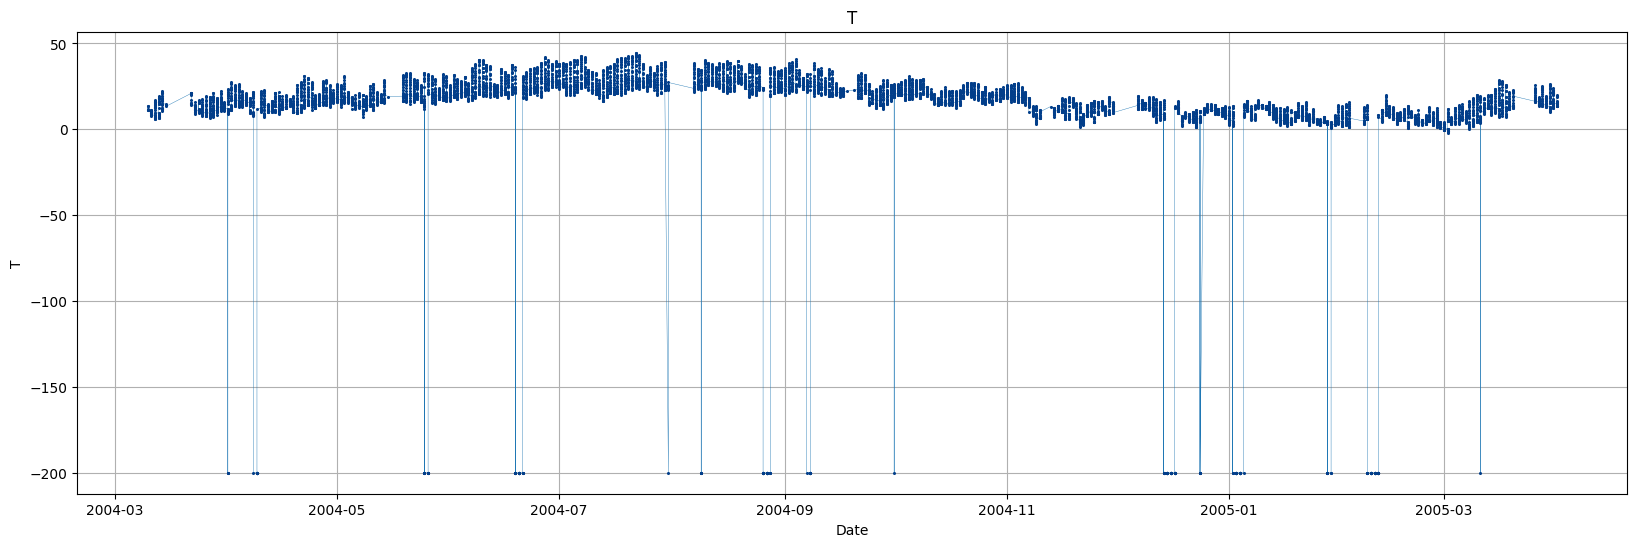

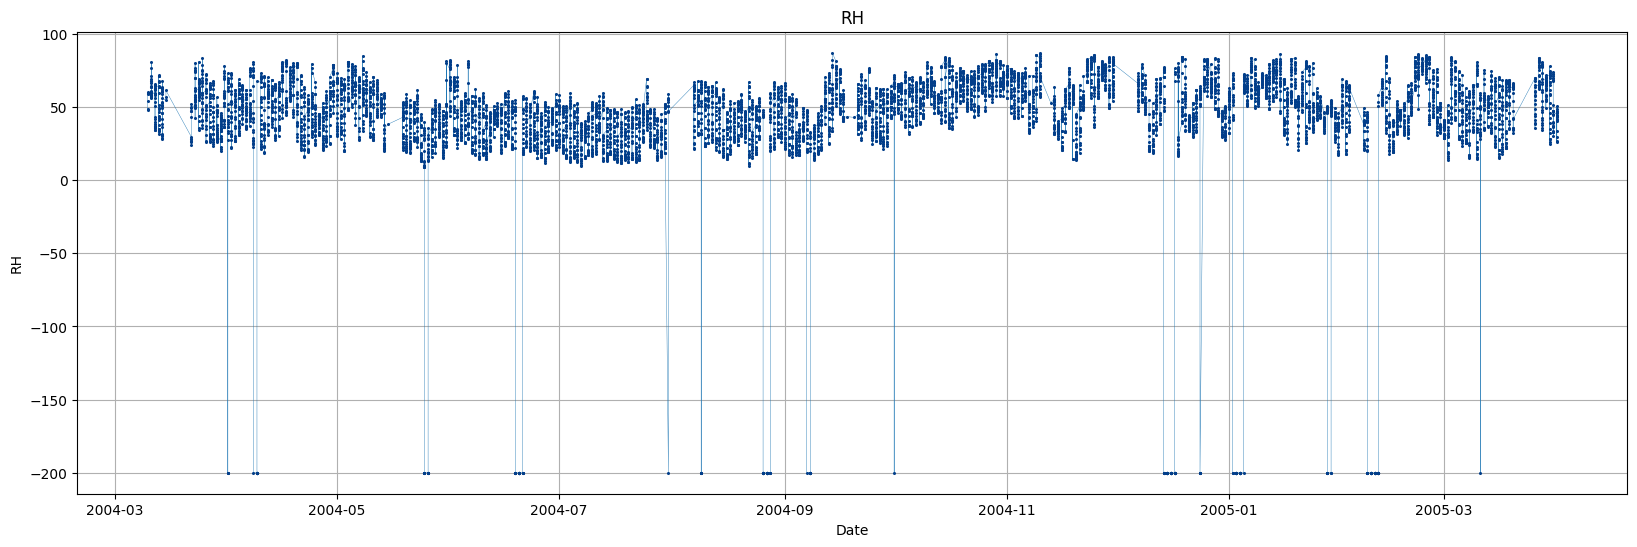

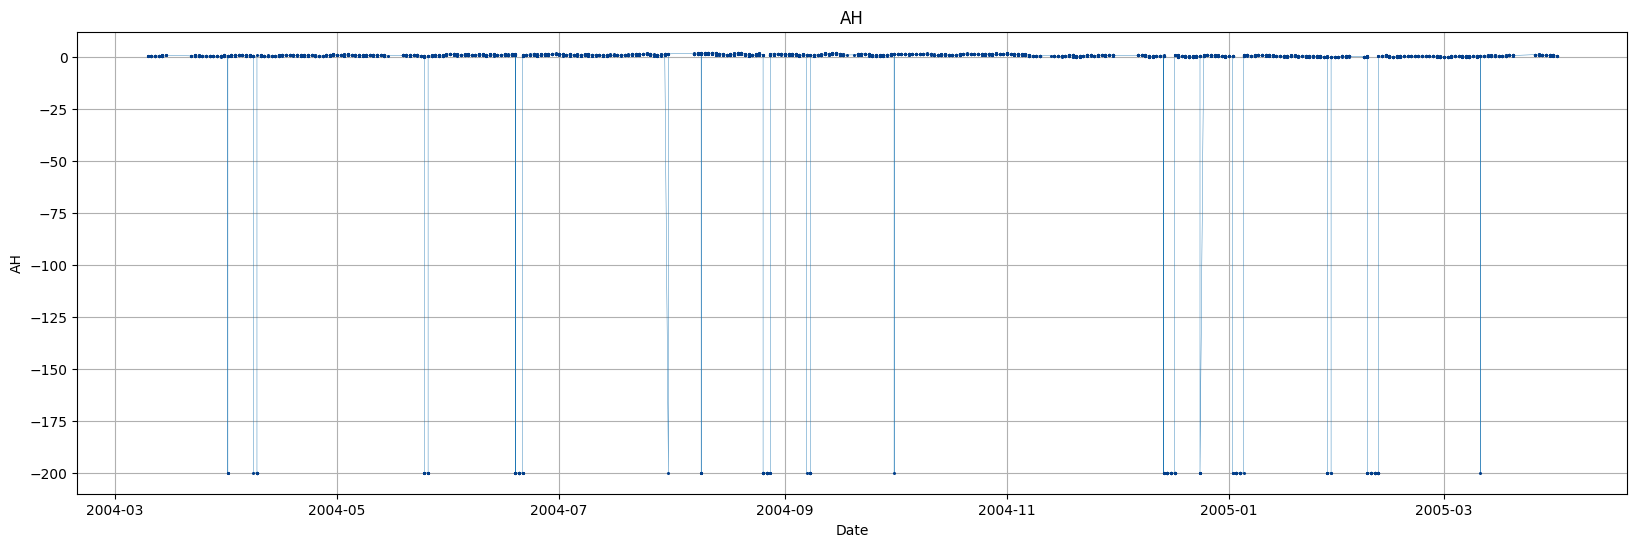

In [6]:
var_num = len(df.columns[2:]) # 13

df.set_index('Date', inplace=True)

for column in df.columns[1:]:
  plt.figure(figsize=(20, 6))
  # Each data is in blue dot, lines are in light blue
  plt.plot(df.index, df[column], marker='o', linestyle='-', markerfacecolor='#023e8a', markeredgecolor='#023e8a', markersize=1.2, linewidth=0.3)
  plt.xlabel('Date')
  plt.ylabel(column)
  plt.title(column)
  plt.grid(True)
  plt.show()

In [7]:
df.reset_index(inplace=True)
df

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  \
0    2004-03-10  18:00:00     2.6      1360.00       150  11.881723   
1    2004-03-10  19:00:00     2.0      1292.25       112   9.397165   
2    2004-03-10  20:00:00     2.2      1402.00        88   8.997817   
3    2004-03-10  21:00:00     2.2      1375.50        80   9.228796   
4    2004-03-10  22:00:00     1.6      1272.25        51   6.518224   
...         ...       ...     ...          ...       ...        ...   
8353 2005-04-01  10:00:00     1.0       947.75      -200   3.525377   
8354 2005-04-01  11:00:00     1.0       938.50      -200   3.576895   
8355 2005-04-01  12:00:00     1.1       924.50      -200   4.045717   
8356 2005-04-01  13:00:00     1.3       923.75      -200   4.519882   
8357 2005-04-01  14:00:00     1.0       890.75      -200   3.276734   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
0           1045.50    166.0       1056.25    113.0       1692.00   
1            954.75    103.0       1173.75     92.0       1558.75   
2            939.25    131.0       1140.00    114.0       1554.50   
3            948.25    172.0       1092.00    122.0       1583.75   
4            835.50    131.0       1205.00    116.0       1490.00   
...             ...      ...           ...      ...           ...   
8353         683.75    180.0        851.00    119.9       1010.50   
8354         686.75    197.1        869.75    122.9        980.50   
8355         713.25    172.0        853.00    114.9        956.75   
8356         738.75    183.6        833.75    122.2        966.00   
8357         669.00    159.9        922.50    110.6        910.50   

      PT08.S5(O3)       T         RH        AH  
0         1267.50  13.600  48.875001  0.757754  
1          972.25  13.300  47.700000  0.725487  
2         1074.00  11.900  53.975000  0.750239  
3         1203.25  11.000  60.000000  0.786713  
4         1110.00  11.150  59.575001  0.788794  
...           ...     ...        ...       ...  
8353       599.00  16.450  40.775000  0.757020  
8354       549.50  18.925  33.775001  0.731210  
8355       518.00  19.175  29.475000  0.648005  
8356       540.50  19.925  26.300000  0.605405  
8357       456.25  19.200  26.950000  0.593404  

[8358 rows x 15 columns]

## 1.3 distribution of variables

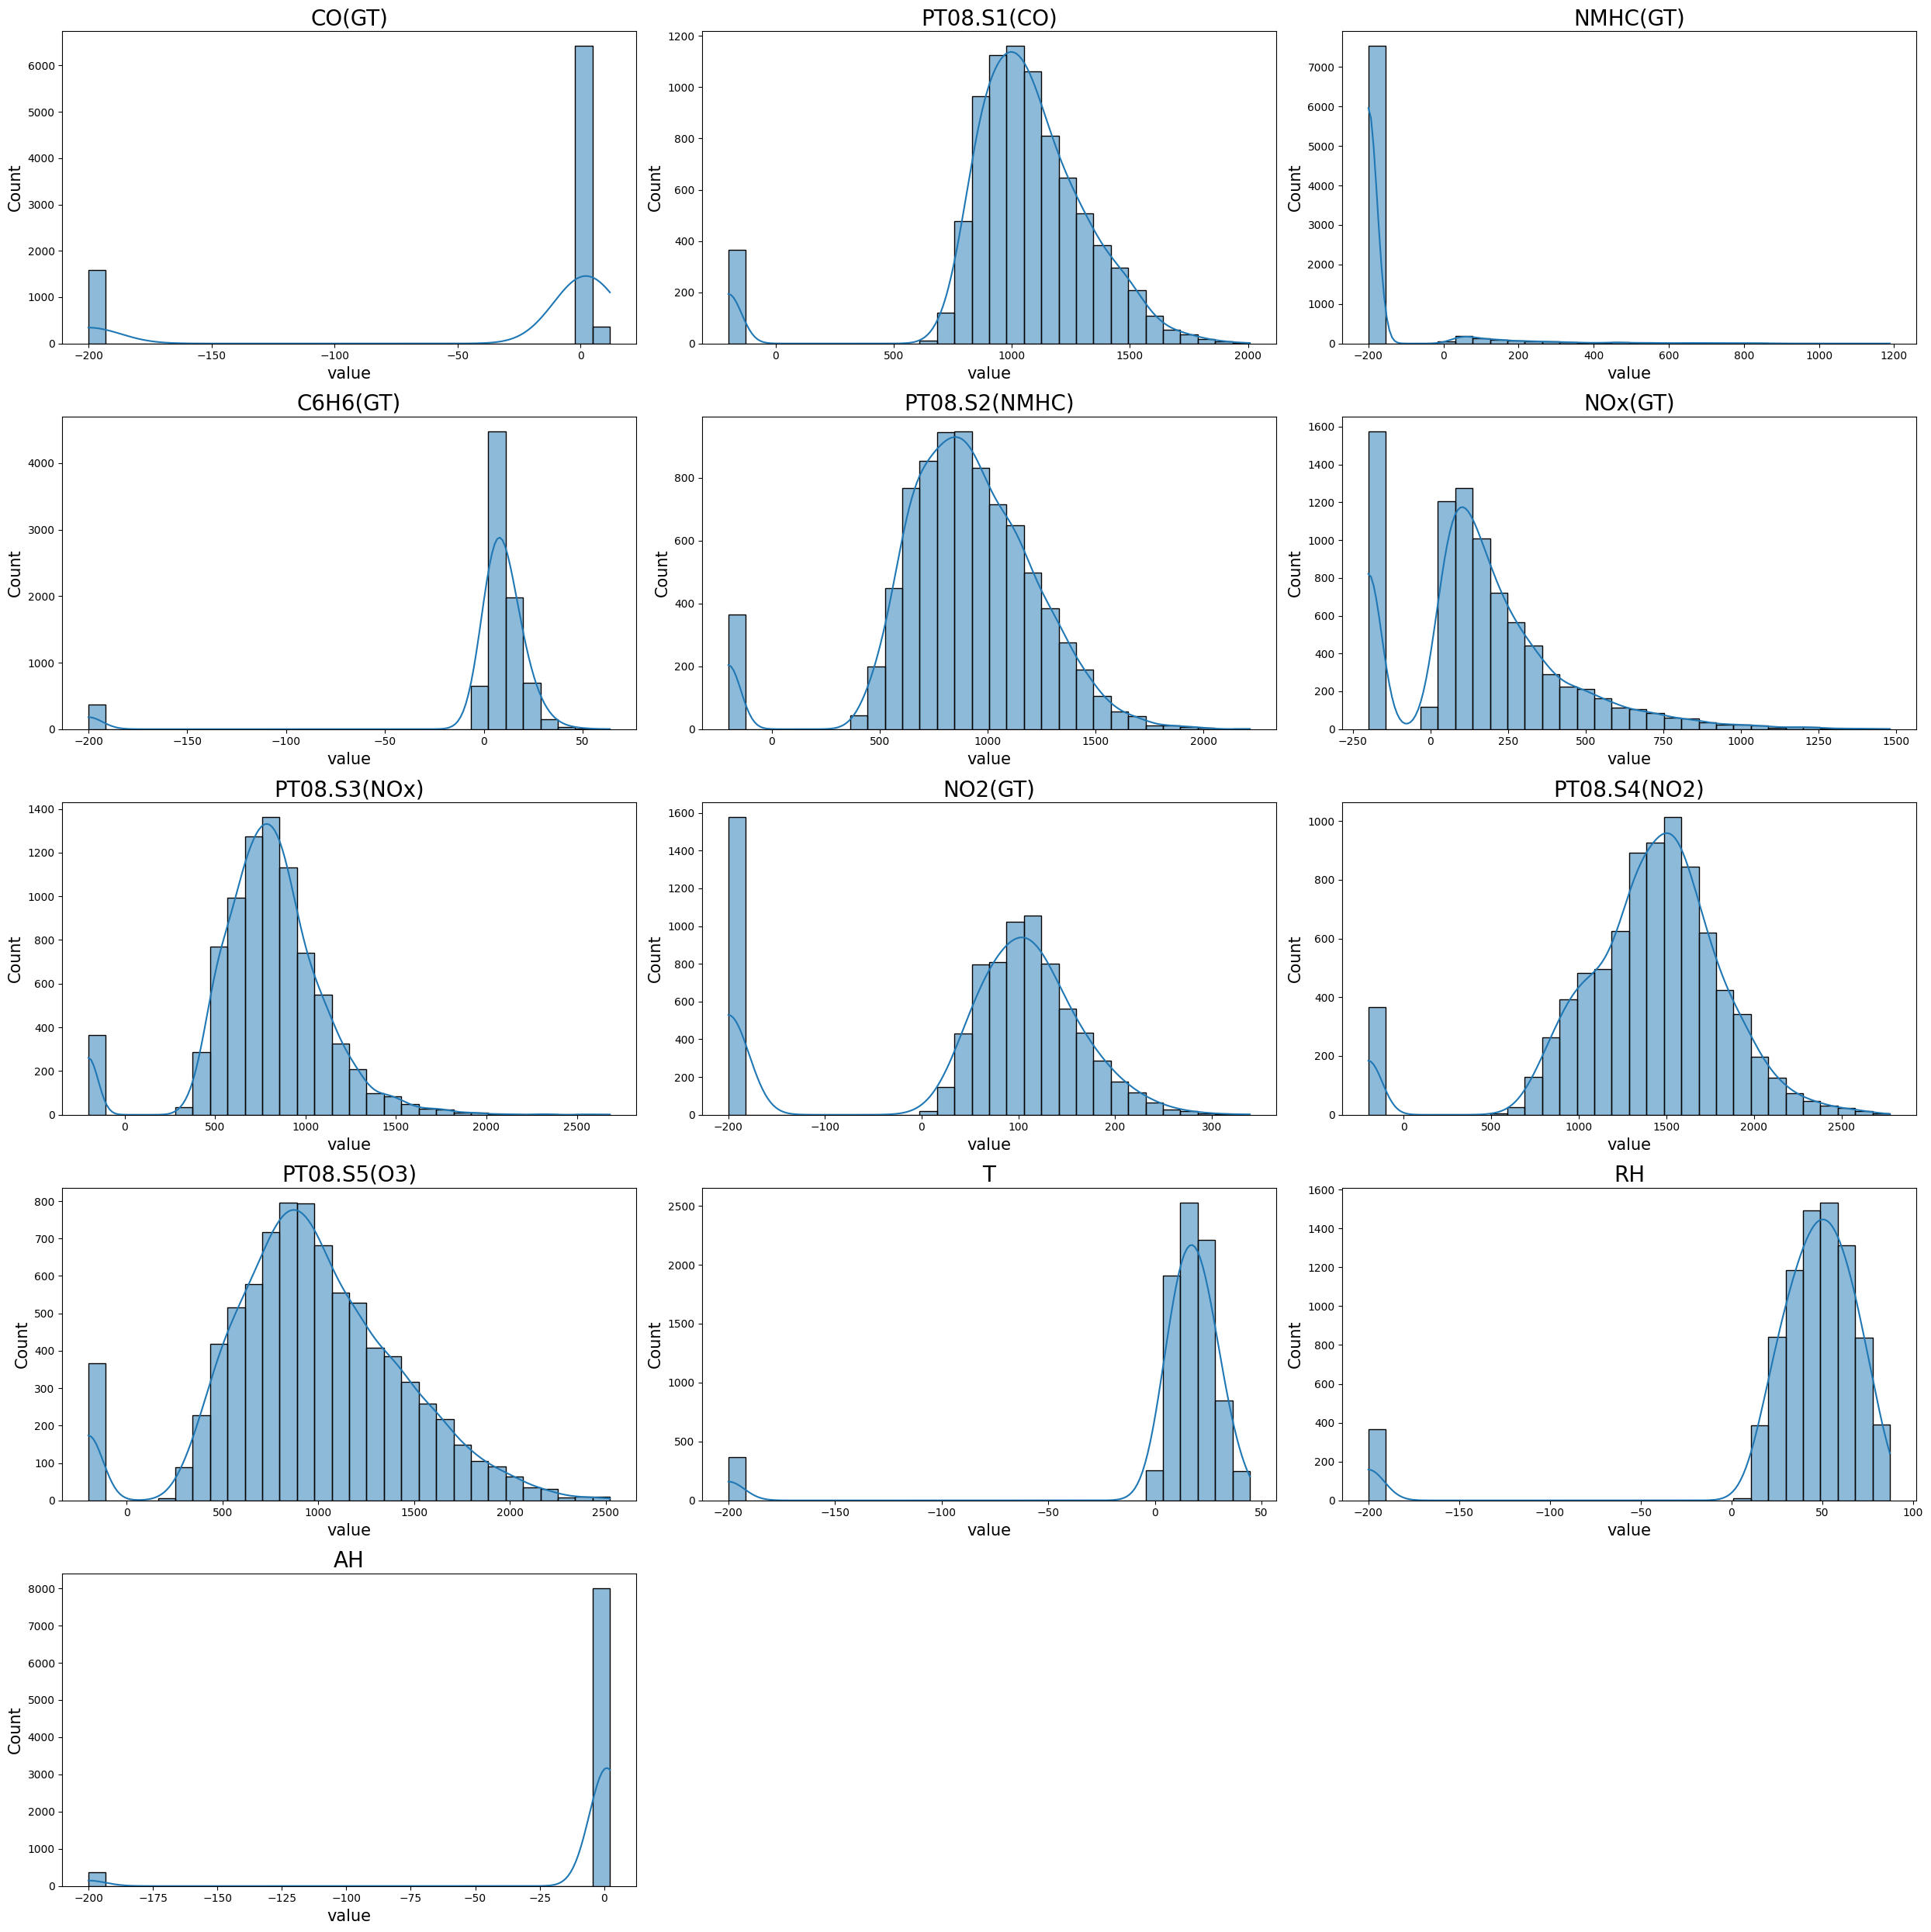

In [8]:
cols = 3
rows = math.ceil(var_num / cols)
variables = df.columns[2:]
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(25, 5 * rows))

for i, variable in enumerate(variables):
    sns.histplot(df[variable], bins=30, ax=axes[i // cols, i % cols], kde=True)
    axes[i // cols, i % cols].set_title(variable, fontsize=20)
    axes[i // cols, i % cols].set_xlabel('value', fontsize=15)
    axes[i // cols, i % cols].set_ylabel('Count', fontsize=15)

# not show the empty graphs
for j in range(13, 15):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()


## 1.4 missing data

### 1.4.1 analyze the missing data

In [9]:
missing_data = df[variables] == -200
sum_missing_data = missing_data.sum()

sum_missing_data

CO(GT)           1585
PT08.S1(CO)       366
NMHC(GT)         7525
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1573
PT08.S3(NOx)      366
NO2(GT)          1576
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

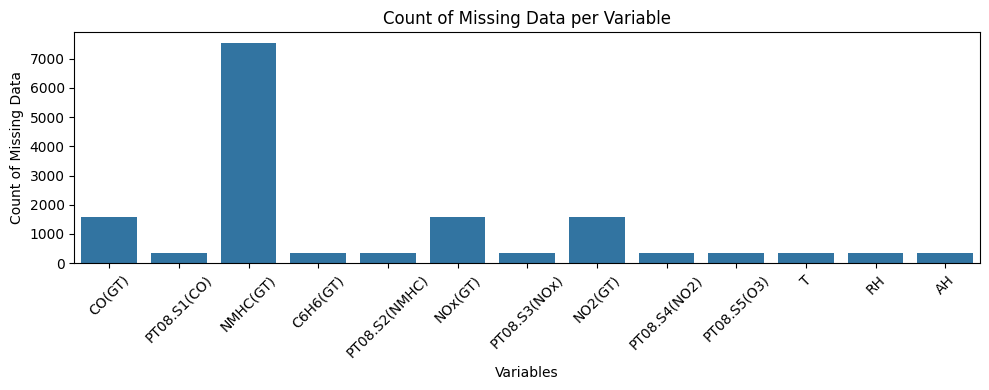

In [10]:
plt.figure(figsize=(10, 4))
sns.barplot(x=sum_missing_data.index, y=sum_missing_data.values, legend=False)
plt.xlabel('Variables')
plt.ylabel('Count of Missing Data')
plt.title('Count of Missing Data per Variable')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [11]:
missing_ratio = sum_missing_data / len(df) * 100
missing_ratio

CO(GT)           18.963867
PT08.S1(CO)       4.379038
NMHC(GT)         90.033501
C6H6(GT)          4.379038
PT08.S2(NMHC)     4.379038
NOx(GT)          18.820292
PT08.S3(NOx)      4.379038
NO2(GT)          18.856186
PT08.S4(NO2)      4.379038
PT08.S5(O3)       4.379038
T                 4.379038
RH                4.379038
AH                4.379038
dtype: float64

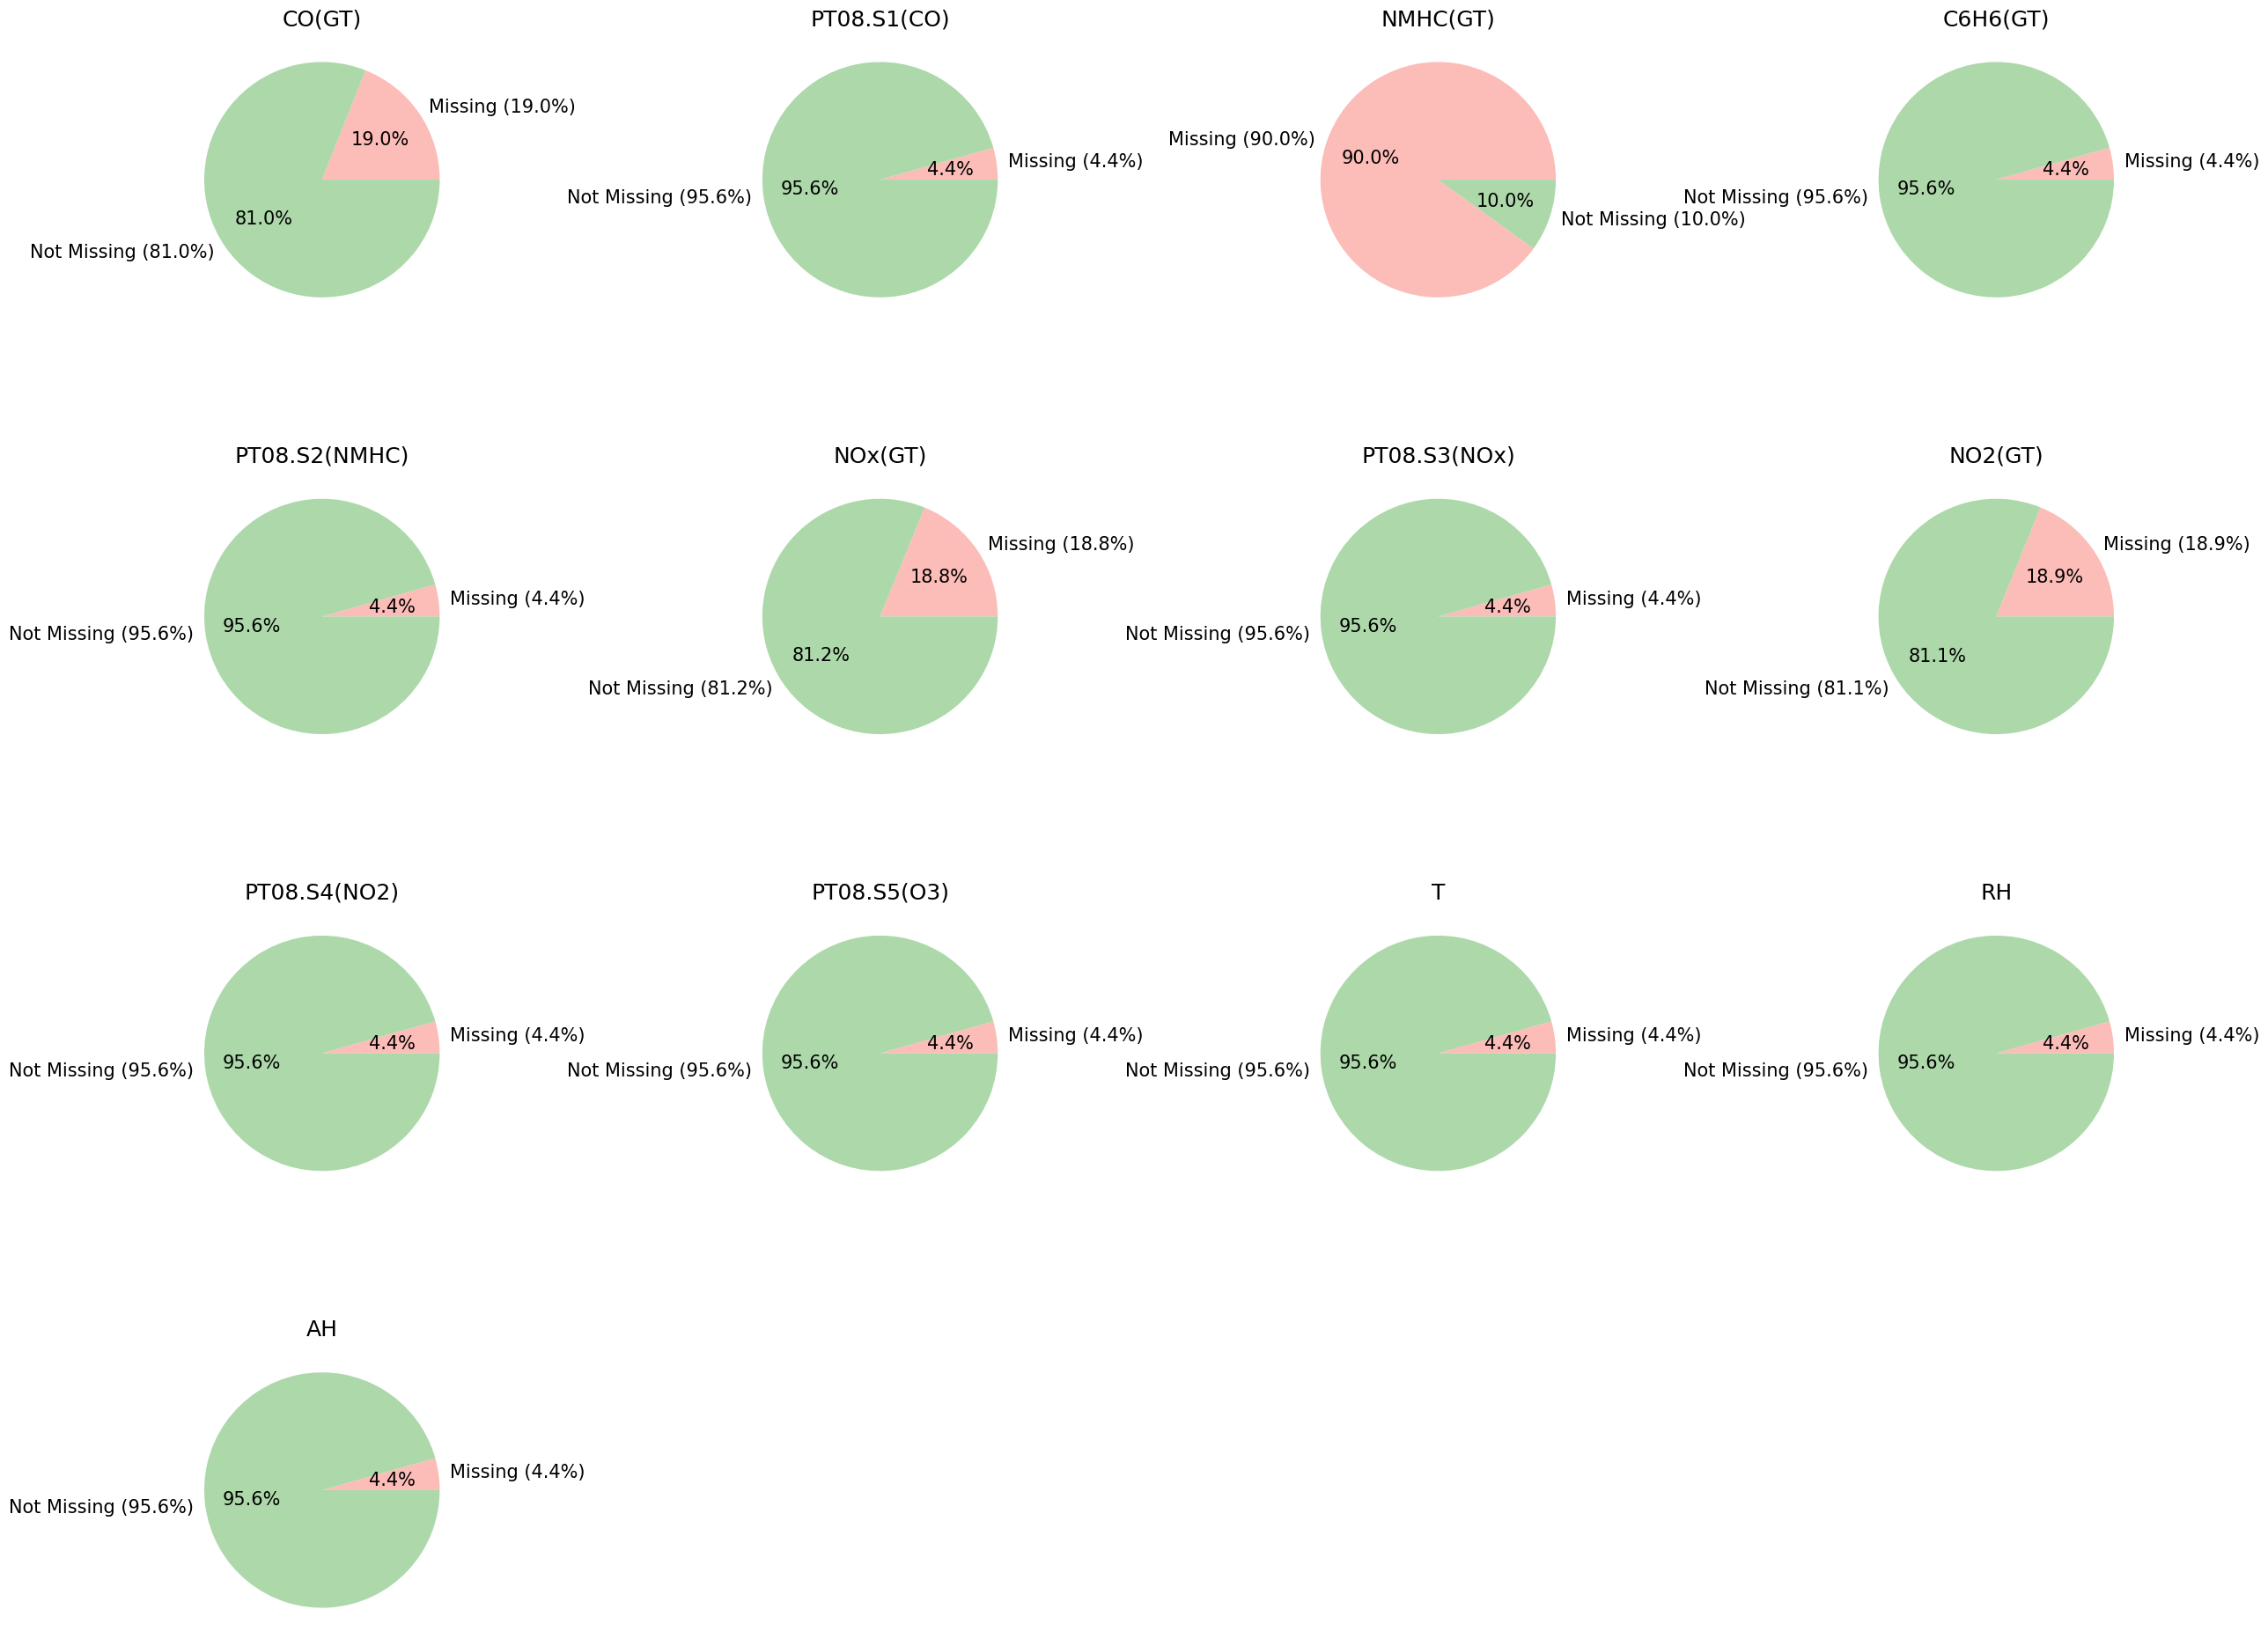

In [12]:
cols = 4
rows = math.ceil(var_num / cols)
variables = df.columns[2:]
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(25, 5 * rows))

for i, variable in enumerate(variables):
    row = i // cols
    col = i % cols
    ax = axes[row, col]
    sizes = [missing_ratio[variable], 100 - missing_ratio[variable]]
    labels = [f'Missing ({missing_ratio[variable]:.1f}%)', f'Not Missing ({100 - missing_ratio[variable]:.1f}%)']
    ax.pie(sizes, labels=labels, colors=['#fcbcb8', '#acd8aa'], autopct='%1.1f%%', textprops={'fontsize': 15})
    ax.set_title(f'{variable}', fontsize=18)

# not show the empty graphs
for j in range(13, rows * cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

### 1.4.2 handle the missing data by using interpolation

In [13]:
# replace -200 to NaN for all the missing value
df[2:] = df[2:].replace(-200, np.nan)

threshold1 = df['CO(GT)'].mean()
# using interpolation to fill the missing data
df_interpolate = df.interpolate(method='linear', inplace=False)
print(threshold1)
df_interpolate

2.146951129484719


Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  \
0    2004-03-10  18:00:00     2.6      1360.00     150.0  11.881723   
1    2004-03-10  19:00:00     2.0      1292.25     112.0   9.397165   
2    2004-03-10  20:00:00     2.2      1402.00      88.0   8.997817   
3    2004-03-10  21:00:00     2.2      1375.50      80.0   9.228796   
4    2004-03-10  22:00:00     1.6      1272.25      51.0   6.518224   
...         ...       ...     ...          ...       ...        ...   
8353 2005-04-01  10:00:00     1.0       947.75     275.0   3.525377   
8354 2005-04-01  11:00:00     1.0       938.50     275.0   3.576895   
8355 2005-04-01  12:00:00     1.1       924.50     275.0   4.045717   
8356 2005-04-01  13:00:00     1.3       923.75     275.0   4.519882   
8357 2005-04-01  14:00:00     1.0       890.75     275.0   3.276734   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
0           1045.50    166.0       1056.25    113.0       1692.00   
1            954.75    103.0       1173.75     92.0       1558.75   
2            939.25    131.0       1140.00    114.0       1554.50   
3            948.25    172.0       1092.00    122.0       1583.75   
4            835.50    131.0       1205.00    116.0       1490.00   
...             ...      ...           ...      ...           ...   
8353         683.75    180.0        851.00    119.9       1010.50   
8354         686.75    197.1        869.75    122.9        980.50   
8355         713.25    172.0        853.00    114.9        956.75   
8356         738.75    183.6        833.75    122.2        966.00   
8357         669.00    159.9        922.50    110.6        910.50   

      PT08.S5(O3)       T         RH        AH  
0         1267.50  13.600  48.875001  0.757754  
1          972.25  13.300  47.700000  0.725487  
2         1074.00  11.900  53.975000  0.750239  
3         1203.25  11.000  60.000000  0.786713  
4         1110.00  11.150  59.575001  0.788794  
...           ...     ...        ...       ...  
8353       599.00  16.450  40.775000  0.757020  
8354       549.50  18.925  33.775001  0.731210  
8355       518.00  19.175  29.475000  0.648005  
8356       540.50  19.925  26.300000  0.605405  
8357       456.25  19.200  26.950000  0.593404  

[8358 rows x 15 columns]

### 1.4.3 data distributions after handling missing data

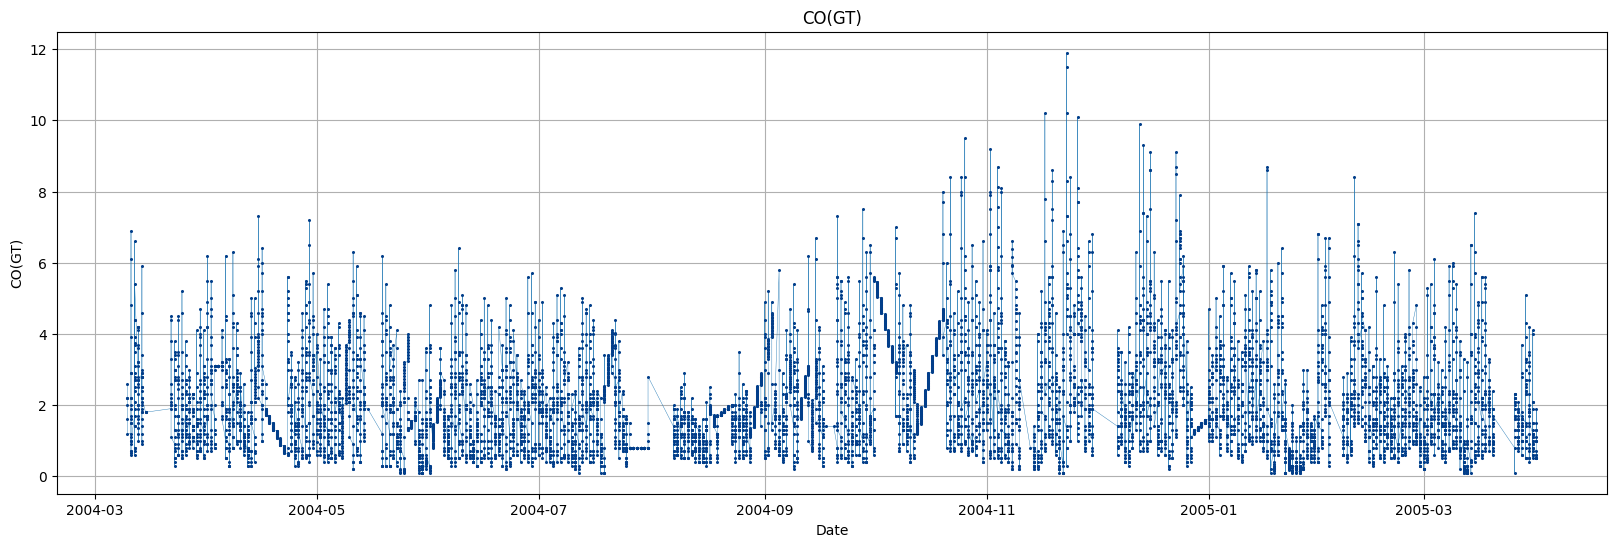

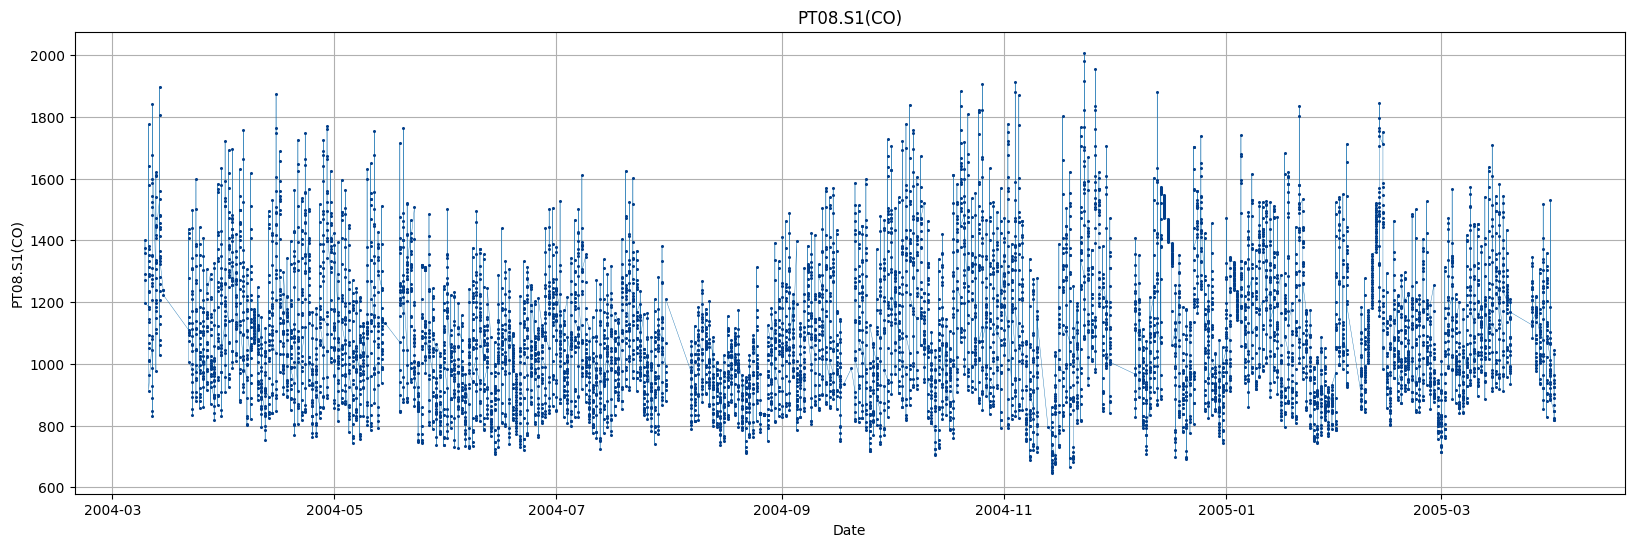

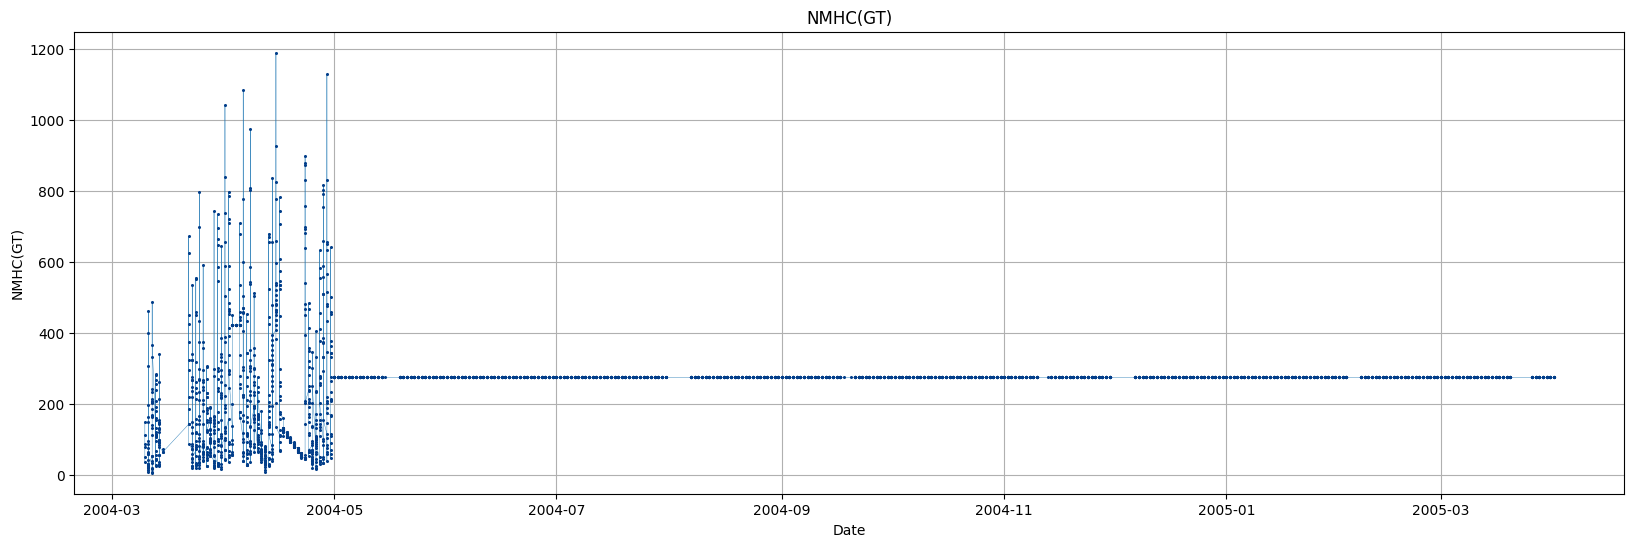

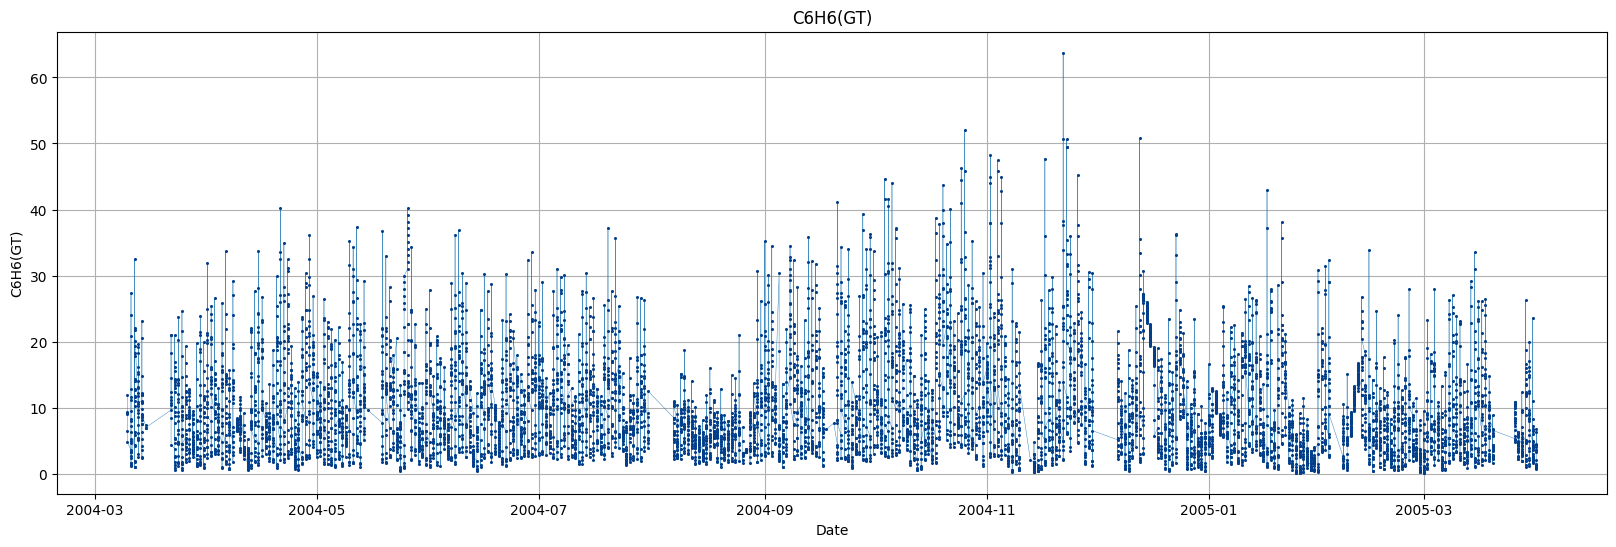

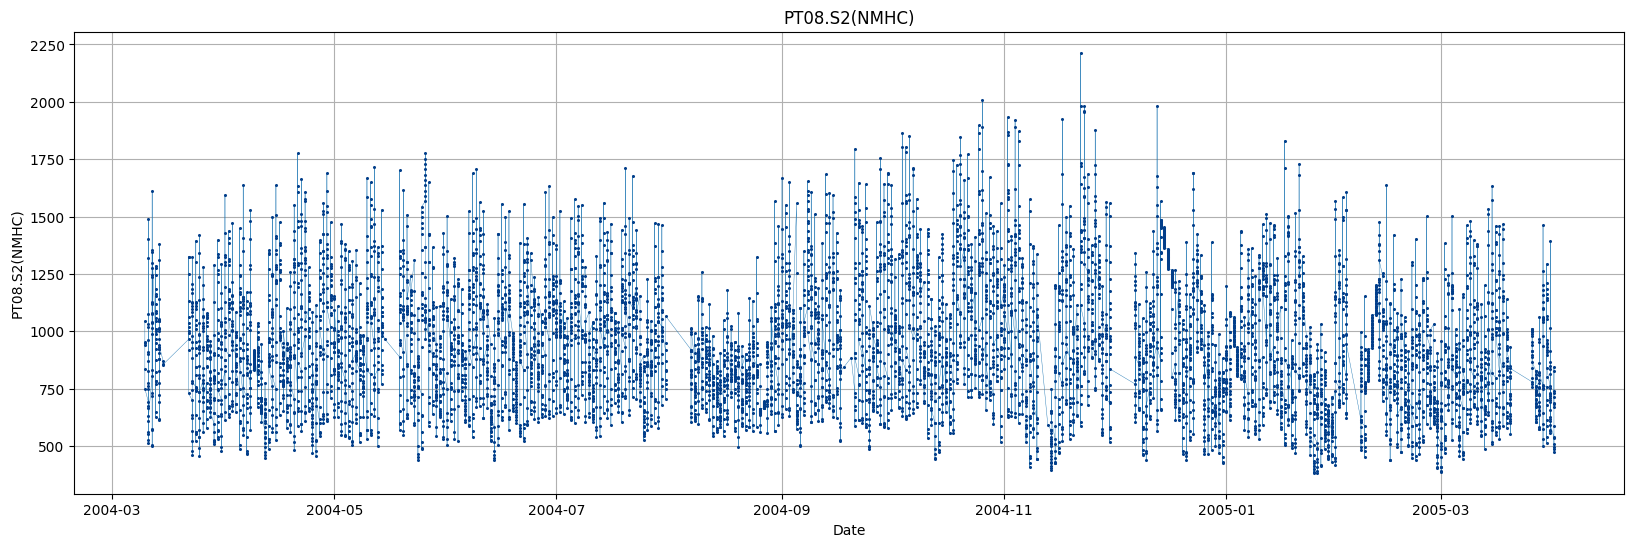

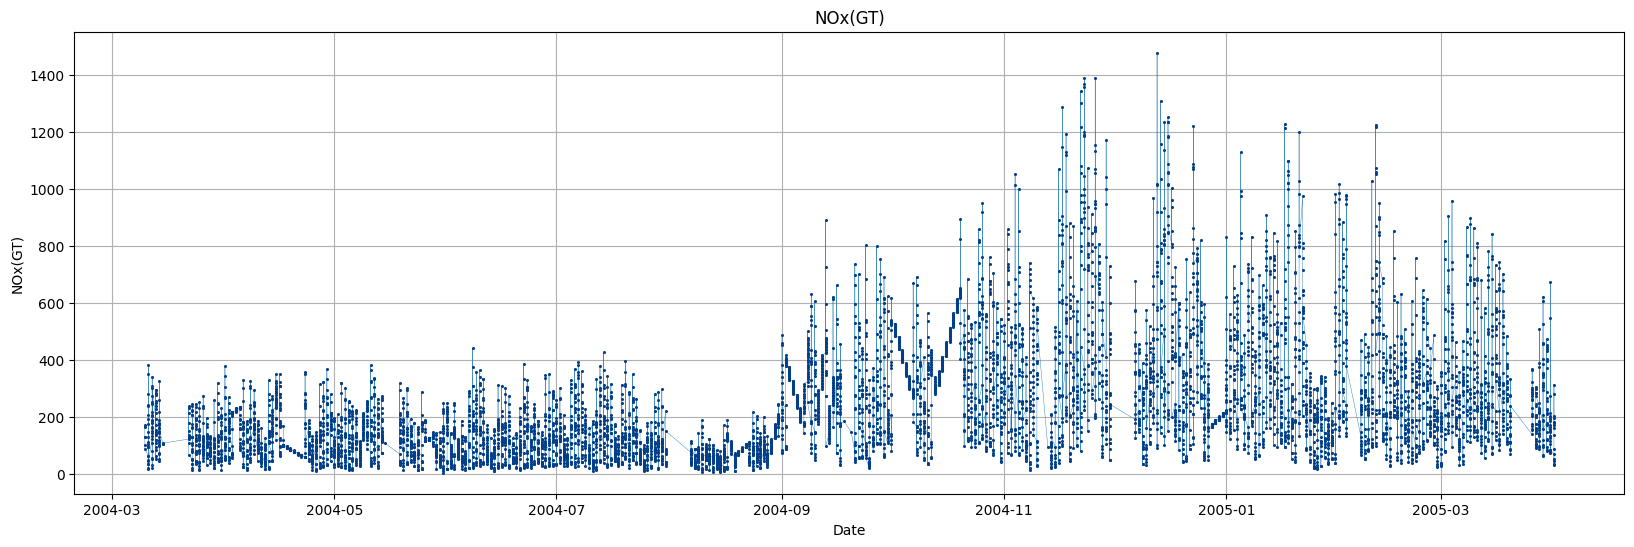

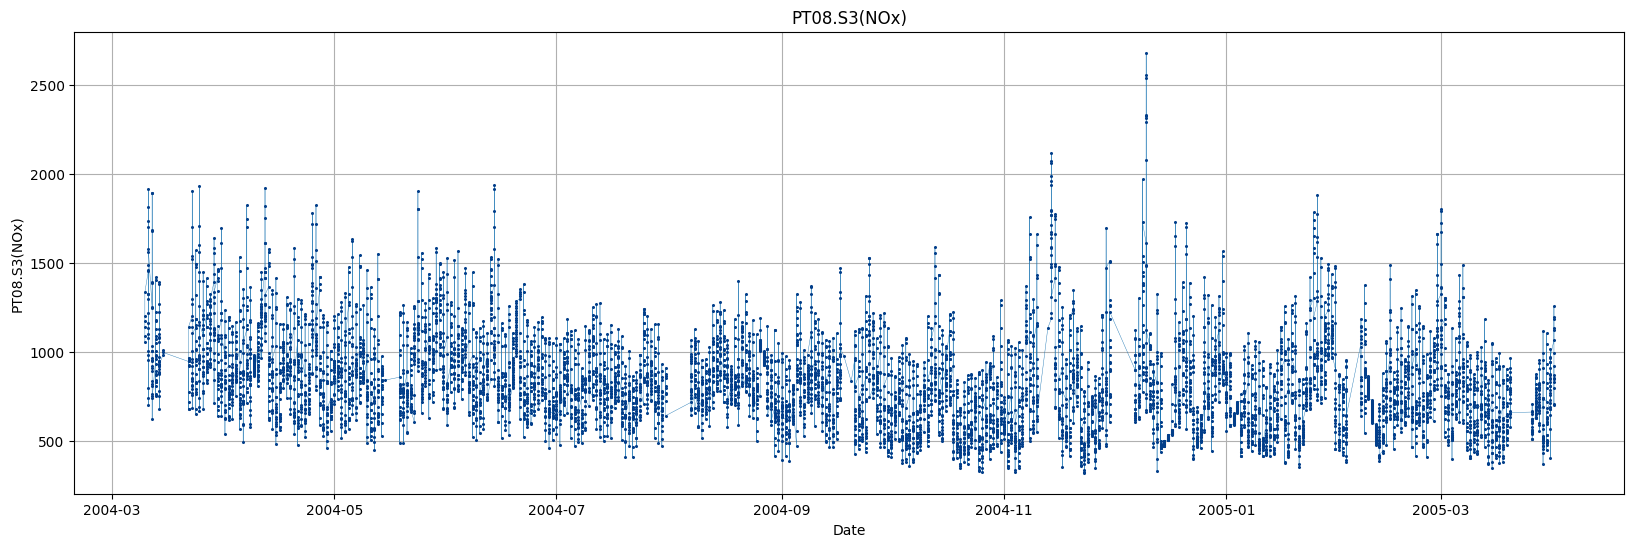

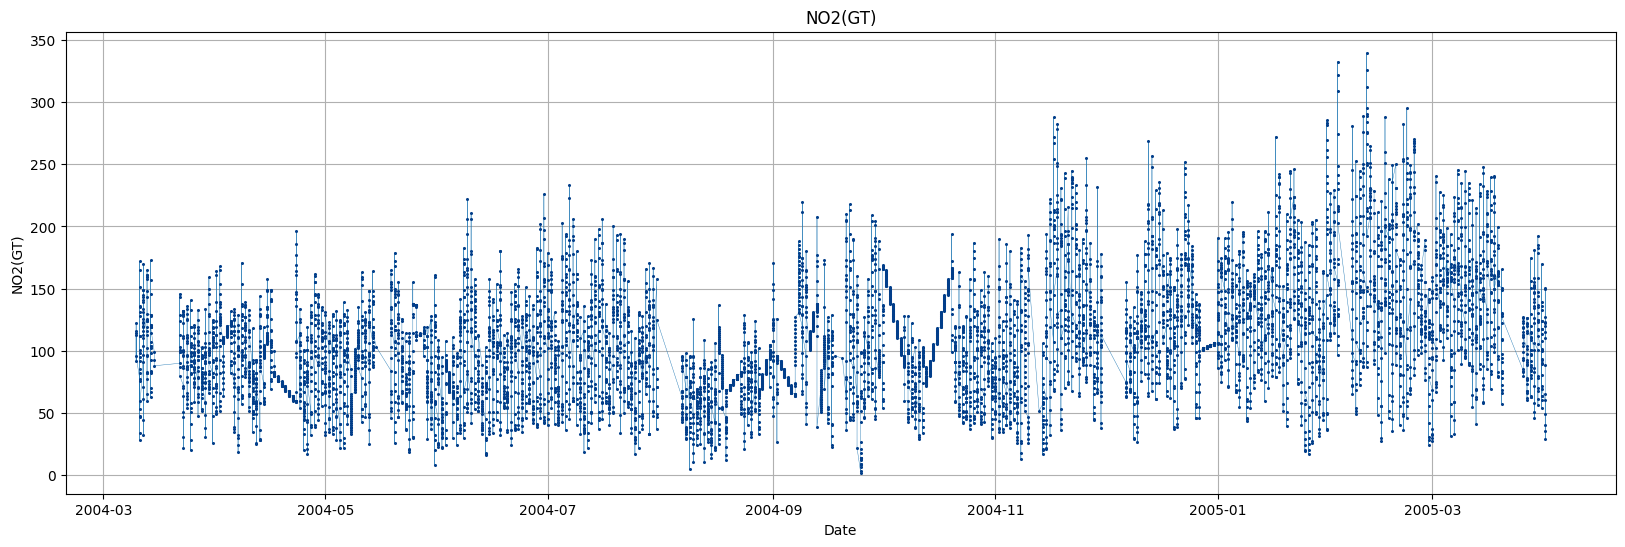

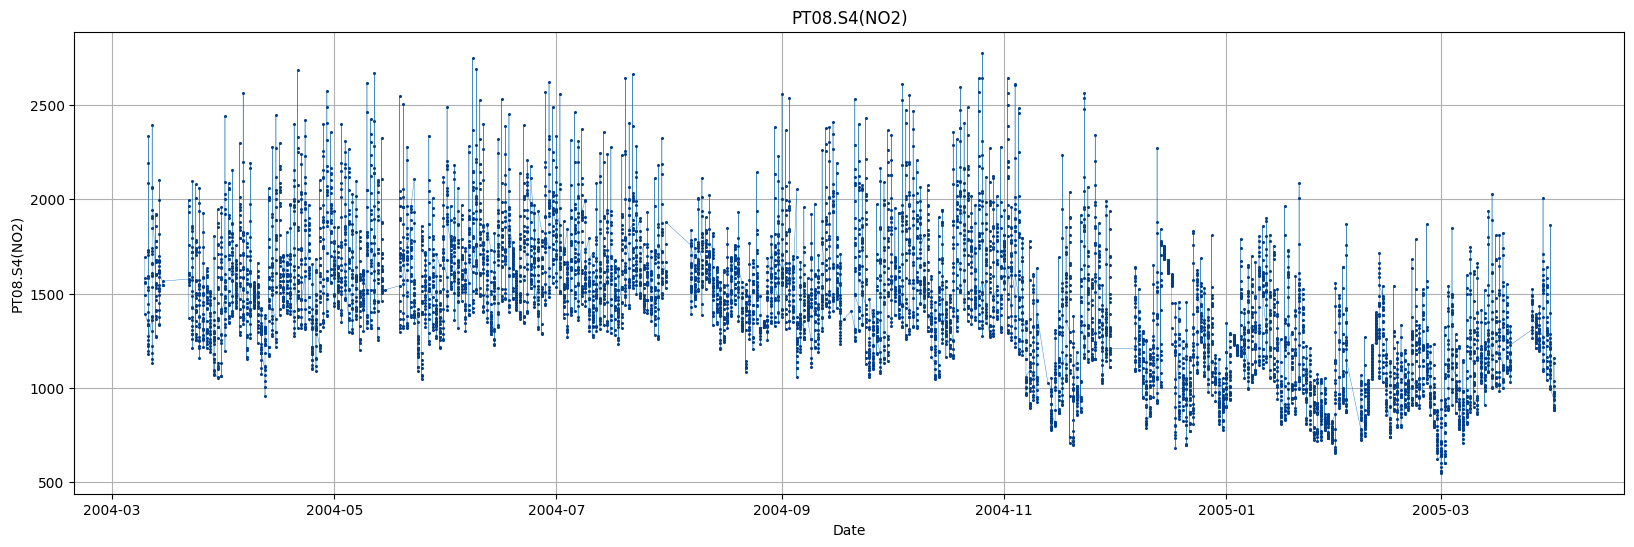

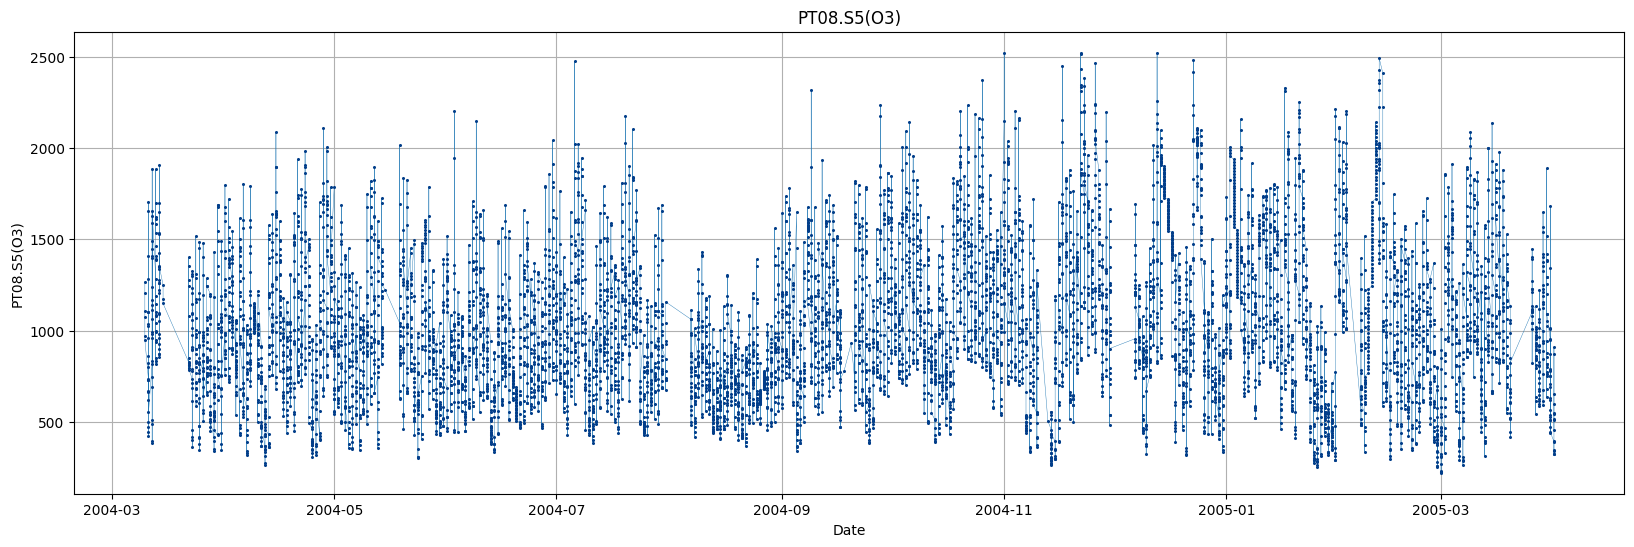

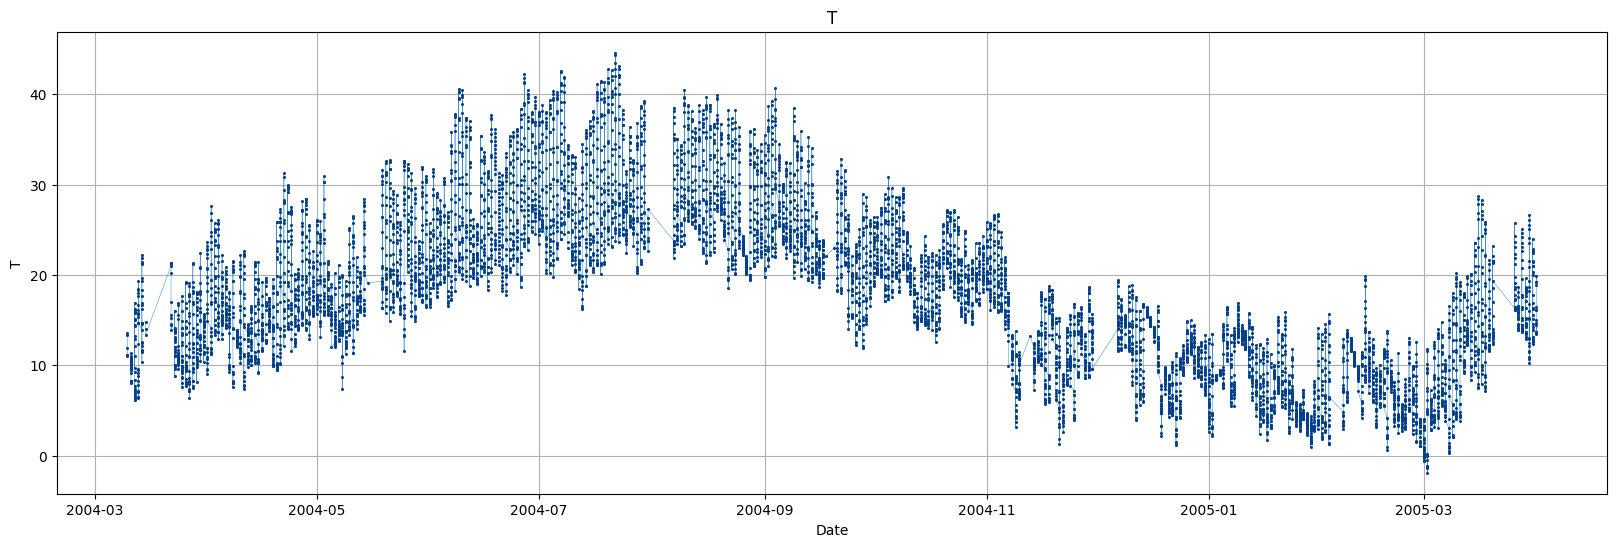

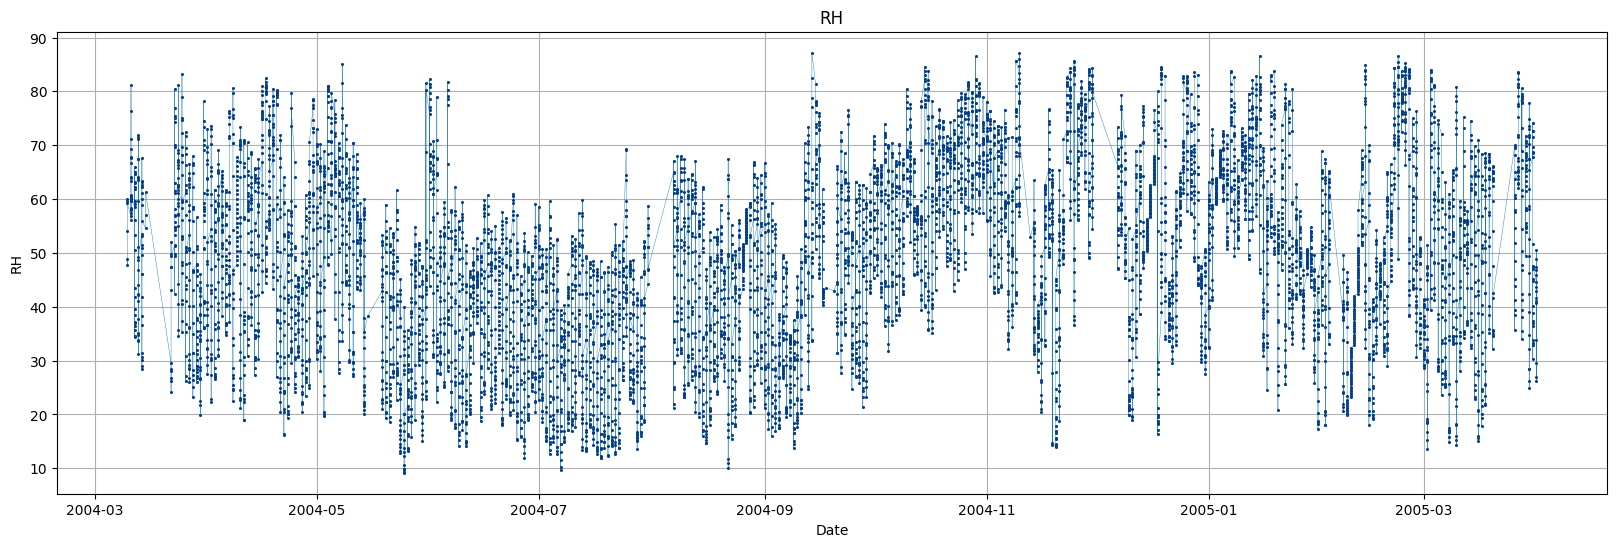

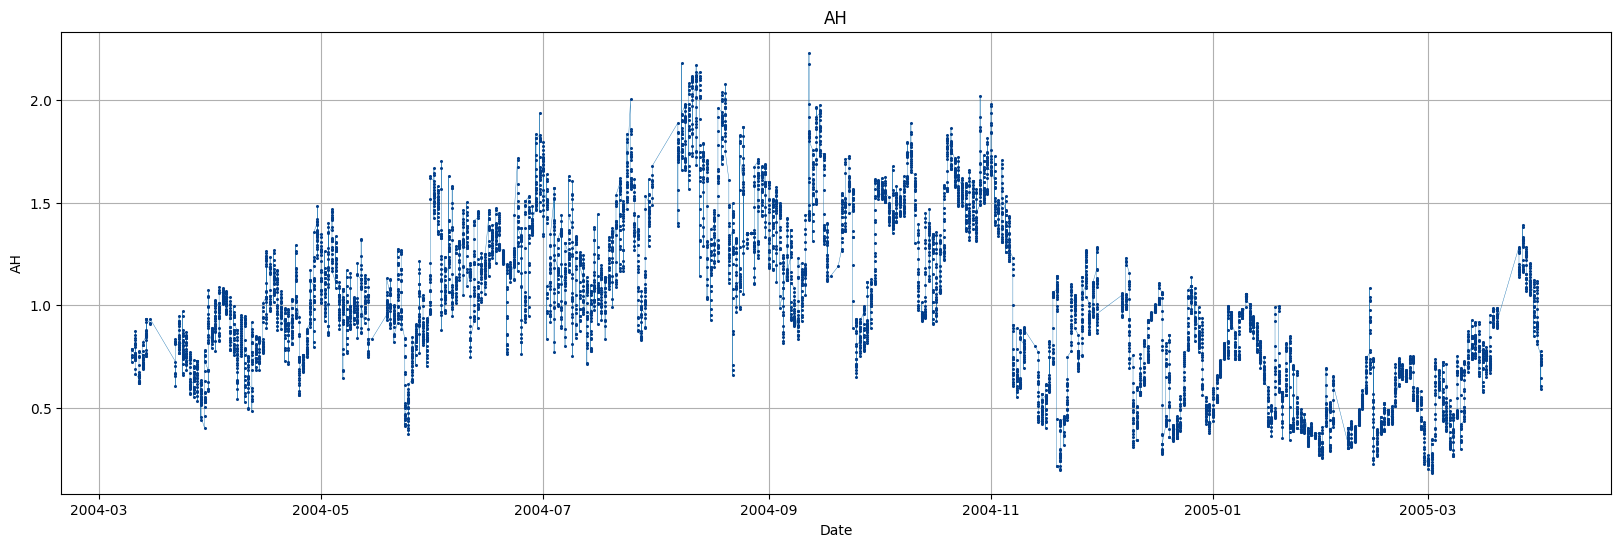

In [14]:
df_interpolate.set_index('Date', inplace=True)

for column in df_interpolate.columns[1:]:
  plt.figure(figsize=(20, 6))
  # Each data is in blue dot, lines are in light blue
  plt.plot(df_interpolate.index, df_interpolate[column], marker='o', linestyle='-', markerfacecolor='#023e8a', markeredgecolor='#023e8a', markersize=1.2, linewidth=0.3)
  plt.xlabel('Date')
  plt.ylabel(column)
  plt.title(column)
  plt.grid(True)
  plt.show()

In [15]:
df_interpolate.reset_index(inplace=True)

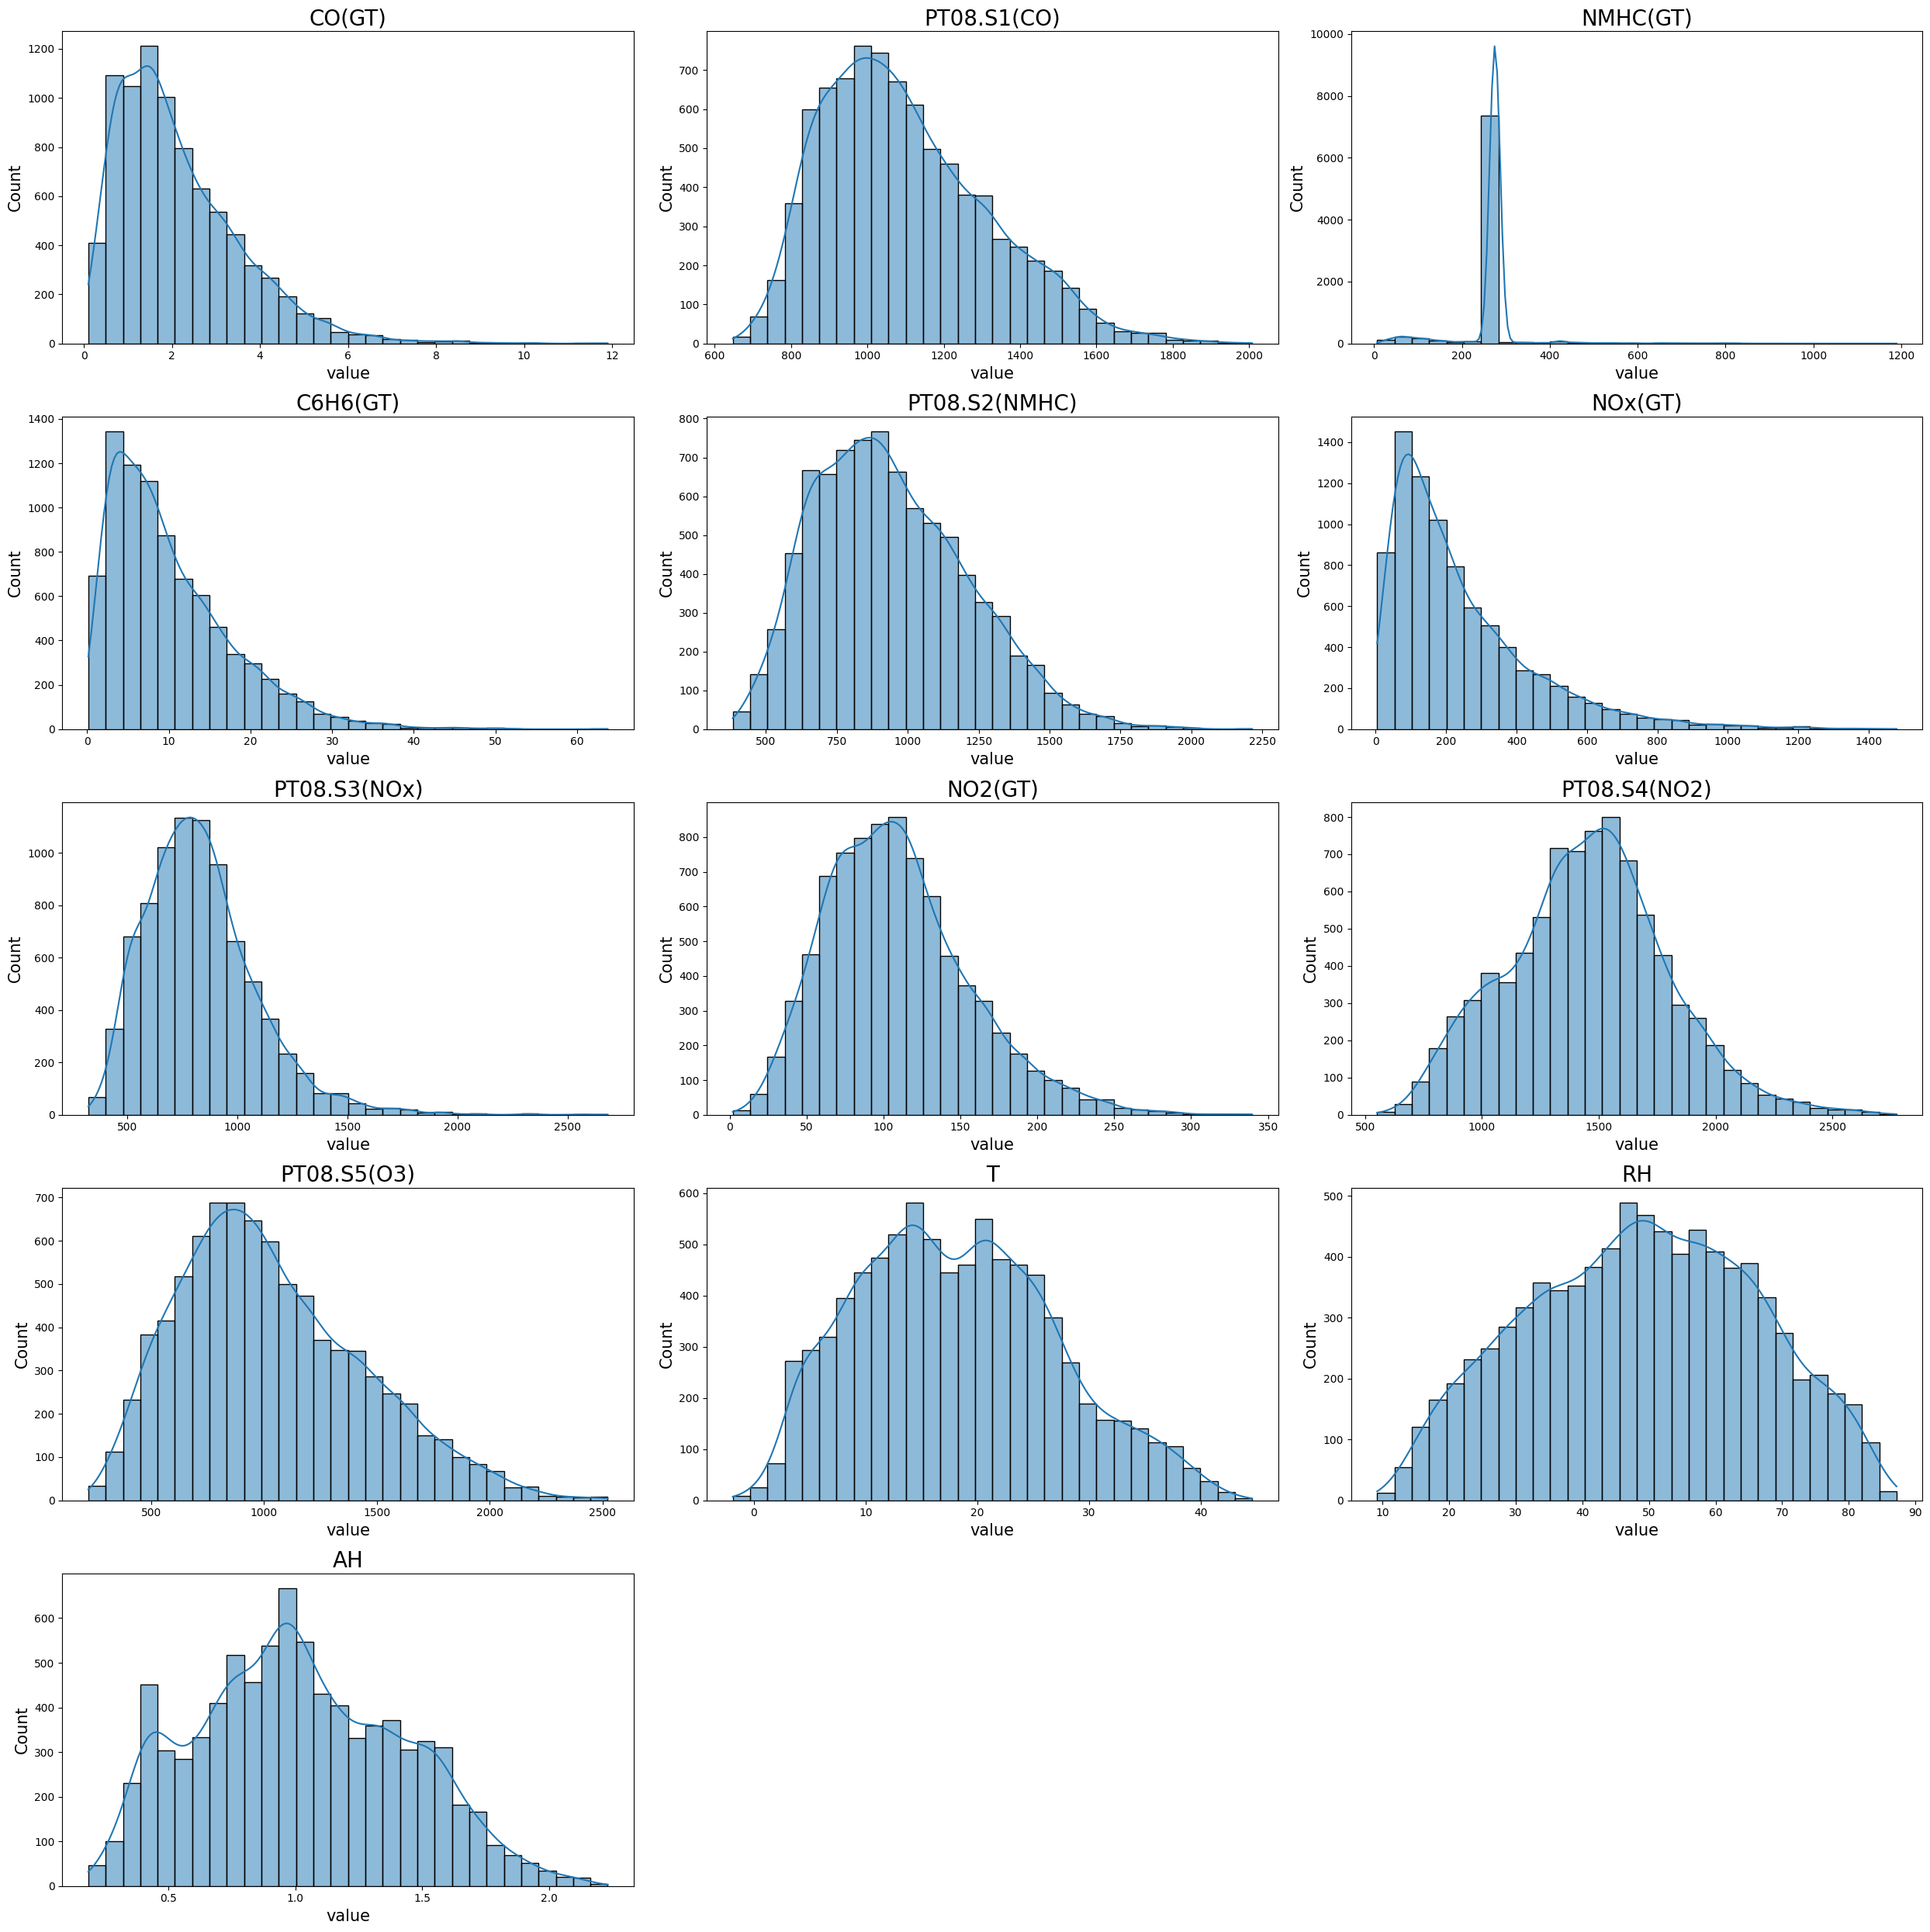

In [16]:
cols = 3
rows = math.ceil(var_num / cols)
variables = df_interpolate.columns[2:]
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(25, 5 * rows))

for i, variable in enumerate(variables):
    sns.histplot(df_interpolate[variable], bins=30, ax=axes[i // cols, i % cols], kde=True)
    axes[i // cols, i % cols].set_title(variable, fontsize=20)
    axes[i // cols, i % cols].set_xlabel('value', fontsize=15)
    axes[i // cols, i % cols].set_ylabel('Count', fontsize=15)

# not show the empty graphs
for j in range(13, 15):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

### 1.4.4 box plots after handling missing data

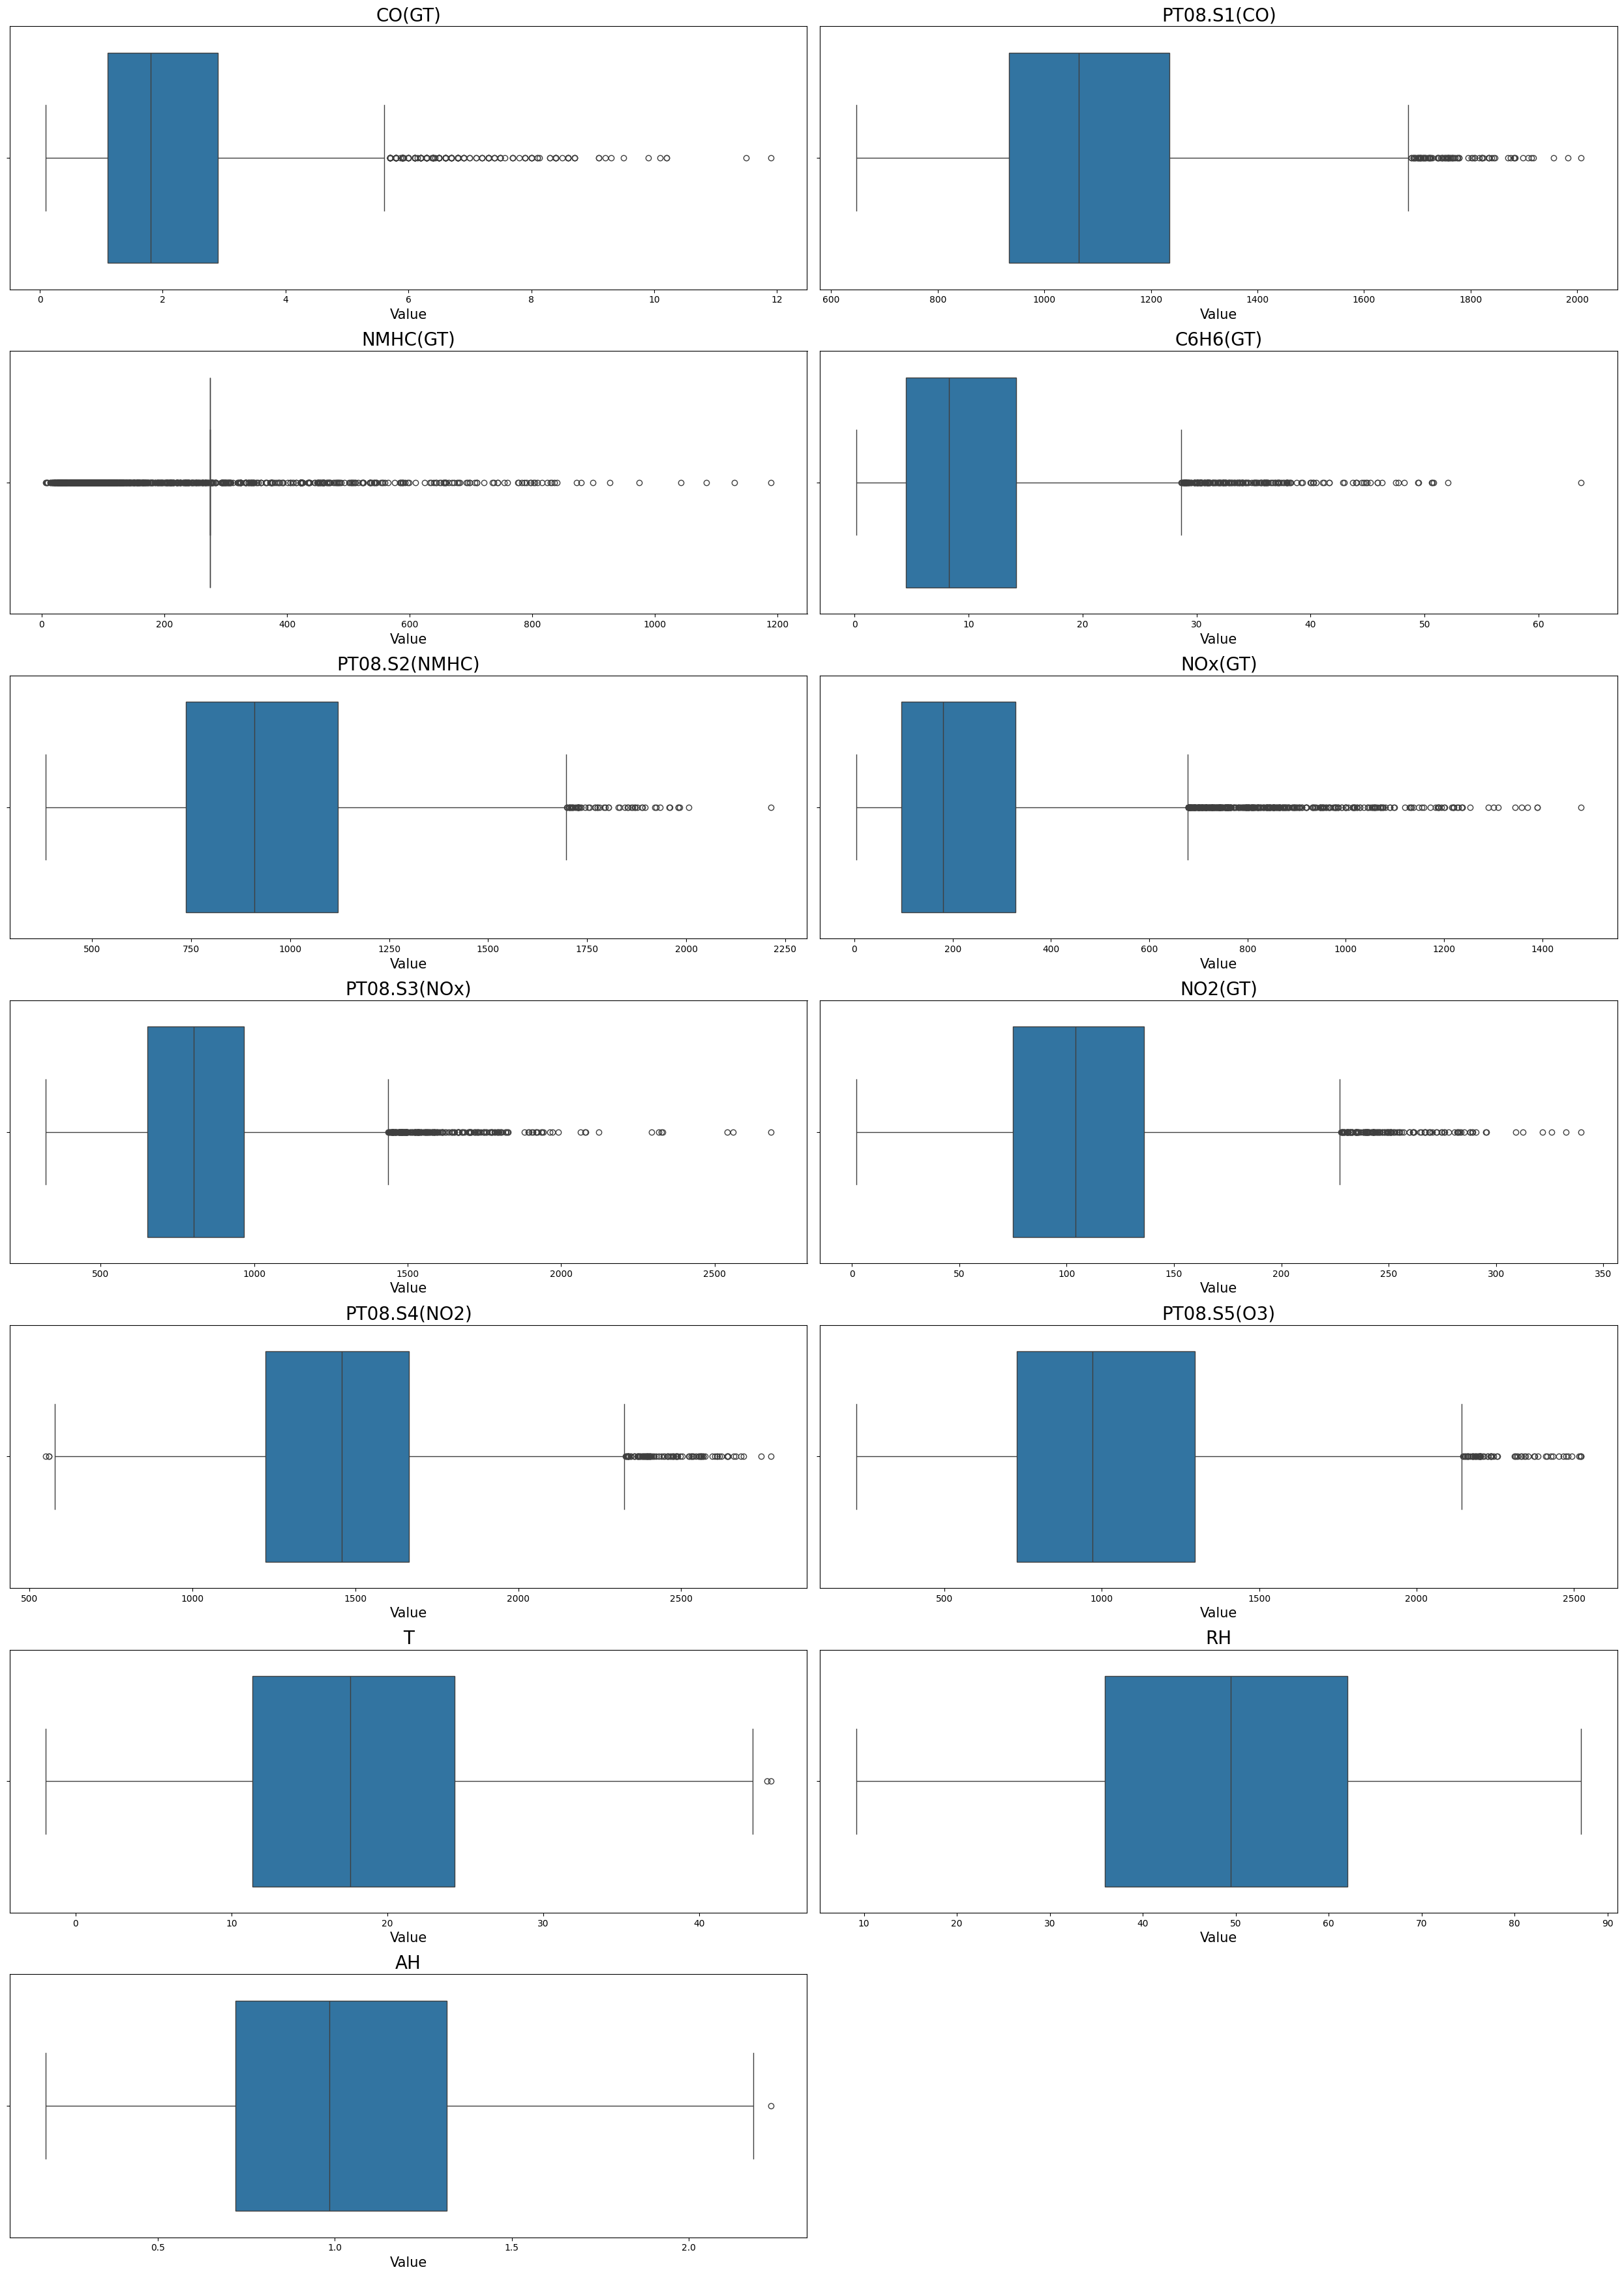

In [17]:
cols = 2
rows = math.ceil(var_num / cols)
variables = df_interpolate.columns[2:]
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(25, 5 * rows))

for i, variable in enumerate(variables):
    sns.boxplot(data=df_interpolate, x=variable, ax=axes[i // cols, i % cols])
    axes[i // cols, i % cols].set_title(variable, fontsize=20)
    axes[i // cols, i % cols].set_xlabel('Value', fontsize=15)
    axes[i // cols, i % cols].set_ylabel('')

# not show the empty graphs
for j in range(var_num, rows * cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

# 2. classification task

## 2.1 features processing

### 2.1.1 add new labels for classification

In [ ]:
# the mean of CO(GT) values – based on historical air quality data -> threshold
# threshold = df_interpolate['CO(GT)'].mean()
print(threshold1)
# print(threshold)

# add a new column in dataframe (if above threshold -> label 1; if below threshold -> label 0)
df_interpolate['CO_label'] = (df_interpolate['CO(GT)'] > threshold1).astype(int)
df_interpolate

2.146951129484719


Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  \
0    2004-03-10  18:00:00     2.6      1360.00     150.0  11.881723   
1    2004-03-10  19:00:00     2.0      1292.25     112.0   9.397165   
2    2004-03-10  20:00:00     2.2      1402.00      88.0   8.997817   
3    2004-03-10  21:00:00     2.2      1375.50      80.0   9.228796   
4    2004-03-10  22:00:00     1.6      1272.25      51.0   6.518224   
...         ...       ...     ...          ...       ...        ...   
8353 2005-04-01  10:00:00     1.0       947.75     275.0   3.525377   
8354 2005-04-01  11:00:00     1.0       938.50     275.0   3.576895   
8355 2005-04-01  12:00:00     1.1       924.50     275.0   4.045717   
8356 2005-04-01  13:00:00     1.3       923.75     275.0   4.519882   
8357 2005-04-01  14:00:00     1.0       890.75     275.0   3.276734   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
0           1045.50    166.0       1056.25    113.0       1692.00   
1            954.75    103.0       1173.75     92.0       1558.75   
2            939.25    131.0       1140.00    114.0       1554.50   
3            948.25    172.0       1092.00    122.0       1583.75   
4            835.50    131.0       1205.00    116.0       1490.00   
...             ...      ...           ...      ...           ...   
8353         683.75    180.0        851.00    119.9       1010.50   
8354         686.75    197.1        869.75    122.9        980.50   
8355         713.25    172.0        853.00    114.9        956.75   
8356         738.75    183.6        833.75    122.2        966.00   
8357         669.00    159.9        922.50    110.6        910.50   

      PT08.S5(O3)       T         RH        AH  CO_label  
0         1267.50  13.600  48.875001  0.757754         1  
1          972.25  13.300  47.700000  0.725487         0  
2         1074.00  11.900  53.975000  0.750239         1  
3         1203.25  11.000  60.000000  0.786713         1  
4         1110.00  11.150  59.575001  0.788794         0  
...           ...     ...        ...       ...       ...  
8353       599.00  16.450  40.775000  0.757020         0  
8354       549.50  18.925  33.775001  0.731210         0  
8355       518.00  19.175  29.475000  0.648005         0  
8356       540.50  19.925  26.300000  0.605405         0  
8357       456.25  19.200  26.950000  0.593404         0  

[8358 rows x 16 columns]

### 2.1.2 correlation heatmap

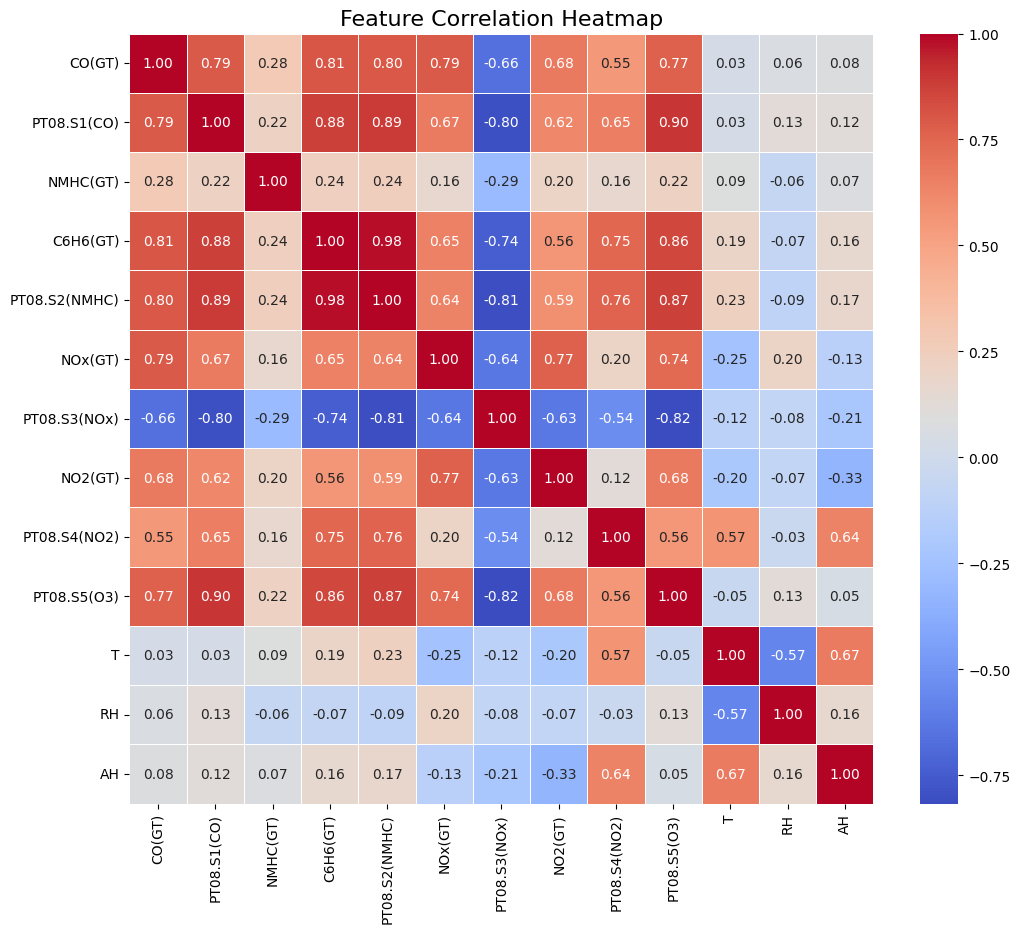

In [ ]:
# only need to get variables from 3rd column to 14th column
variables = df_interpolate.columns[2:15]
feature_correlation = df_interpolate[variables].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(feature_correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, annot_kws={"size": 10})
plt.title('Feature Correlation Heatmap', fontsize=16)

plt.show()

### 2.1.3 feature selection

In [ ]:
# select the features/variables that strongly correlated to the target variable (CO(GT))
# drop the variable that poorly correlated with the target variable (CO(GT))
# set a threshold for feature selection as 0.5
# therefore drop all columns with a correlation coefficient value lower than 0.5

drop_columns_class = ["Date", "Time", "CO(GT)", "NMHC(GT)", "PT08.S3(NOx)", "T", "RH", "AH", "CO_label"]
X_class = df_interpolate.drop(columns = drop_columns_class)
y_class = df_interpolate['CO_label']
X_class

PT08.S1(CO)   C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  NO2(GT)  PT08.S4(NO2)  \
0         1360.00  11.881723        1045.50    166.0    113.0       1692.00   
1         1292.25   9.397165         954.75    103.0     92.0       1558.75   
2         1402.00   8.997817         939.25    131.0    114.0       1554.50   
3         1375.50   9.228796         948.25    172.0    122.0       1583.75   
4         1272.25   6.518224         835.50    131.0    116.0       1490.00   
...           ...        ...            ...      ...      ...           ...   
8353       947.75   3.525377         683.75    180.0    119.9       1010.50   
8354       938.50   3.576895         686.75    197.1    122.9        980.50   
8355       924.50   4.045717         713.25    172.0    114.9        956.75   
8356       923.75   4.519882         738.75    183.6    122.2        966.00   
8357       890.75   3.276734         669.00    159.9    110.6        910.50   

      PT08.S5(O3)  
0         1267.50  
1          972.25  
2         1074.00  
3         1203.25  
4         1110.00  
...           ...  
8353       599.00  
8354       549.50  
8355       518.00  
8356       540.50  
8357       456.25  

[8358 rows x 7 columns]

In [ ]:
y_class

0       1
1       0
2       1
3       1
4       0
       ..
8353    0
8354    0
8355    0
8356    0
8357    0
Name: CO_label, Length: 8358, dtype: int64

### 2.1.4 Standardization for X

In [ ]:
scaler = StandardScaler()
X_class = scaler.fit_transform(X_class)

# save the scaler for new test dataset
joblib.dump(scaler, 'scaler.save')

X_class

array([[ 1.20548364,  0.22330981,  0.38311304, ...,  0.07849361,
         0.69924364,  0.57641716],
       [ 0.89249561, -0.10683763,  0.0453998 , ..., -0.36935676,
         0.31118854, -0.14858627],
       [ 1.39951313, -0.15990289, -0.01228125, ...,  0.09981982,
         0.29881155,  0.10126674],
       ...,
       [-0.80641731, -0.81793647, -0.85330815, ...,  0.11901341,
        -1.44197595, -1.26402338],
       [-0.80988212, -0.75492955, -0.75841352, ...,  0.27469473,
        -1.41503779, -1.20877333],
       [-0.96233385, -0.92011872, -1.01797824, ...,  0.02731071,
        -1.57666675, -1.41565407]])

### 2.1.5 Splitting dataset (train, validation, test)

In [ ]:
X_train_class, X_val_test_class, y_train_class, y_val_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state = 42)
X_val_class, X_test_class, y_val_class, y_test_class = train_test_split(X_val_test_class, y_val_test_class, test_size=0.5, random_state = 42)

X_train_class.shape, y_train_class.shape, X_val_class.shape, y_val_class.shape, X_test_class.shape, y_test_class.shape

((6686, 7), (6686,), (836, 7), (836,), (836, 7), (836,))

## 2.2 build model

In [ ]:
# build model
# add regularization to prevent overfitting in neural networks
class_model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_class.shape[1],), kernel_regularizer=l2(0.001)),
    Dropout(0.2),
    Dense(16, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# compile model
class_model.compile(optimizer=Adam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])
class_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                256       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 801 (3.13 KB)
Trainable params: 801 (3.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## 2.3 training

In [ ]:
# save the model with the smallest val_loss
checkpoint = ModelCheckpoint(filepath='class_best_model.keras',
                             monitor='val_loss', mode='min',
                             save_best_only=True, verbose=1)

# train
history_class = class_model.fit(X_train_class, y_train_class, epochs=100, batch_size=16,
                                validation_data=(X_val_class, y_val_class), callbacks=[checkpoint])

history_class_df = pd.DataFrame(history_class.history)

Epoch 1/100
411/418 [============================>.] - ETA: 0s - loss: 0.4624 - accuracy: 0.7958
Epoch 1: val_loss improved from inf to 0.30308, saving model to class_best_model.keras
418/418 [==============================] - 3s 4ms/step - loss: 0.4603 - accuracy: 0.7973 - val_loss: 0.3031 - val_accuracy: 0.8947
Epoch 2/100
403/418 [===========================>..] - ETA: 0s - loss: 0.3347 - accuracy: 0.8832
Epoch 2: val_loss improved from 0.30308 to 0.28471, saving model to class_best_model.keras
418/418 [==============================] - 1s 2ms/step - loss: 0.3317 - accuracy: 0.8841 - val_loss: 0.2847 - val_accuracy: 0.8995
Epoch 3/100
392/418 [===========================>..] - ETA: 0s - loss: 0.3144 - accuracy: 0.8887
Epoch 3: val_loss improved from 0.28471 to 0.28070, saving model to class_best_model.keras
418/418 [==============================] - 1s 2ms/step - loss: 0.3110 - accuracy: 0.8907 - val_loss: 0.2807 - val_accuracy: 0.8995
Epoch 4/100
392/418 [==========================

## 2.4 Validation

### 2.4.1 Loss plot for the classification task

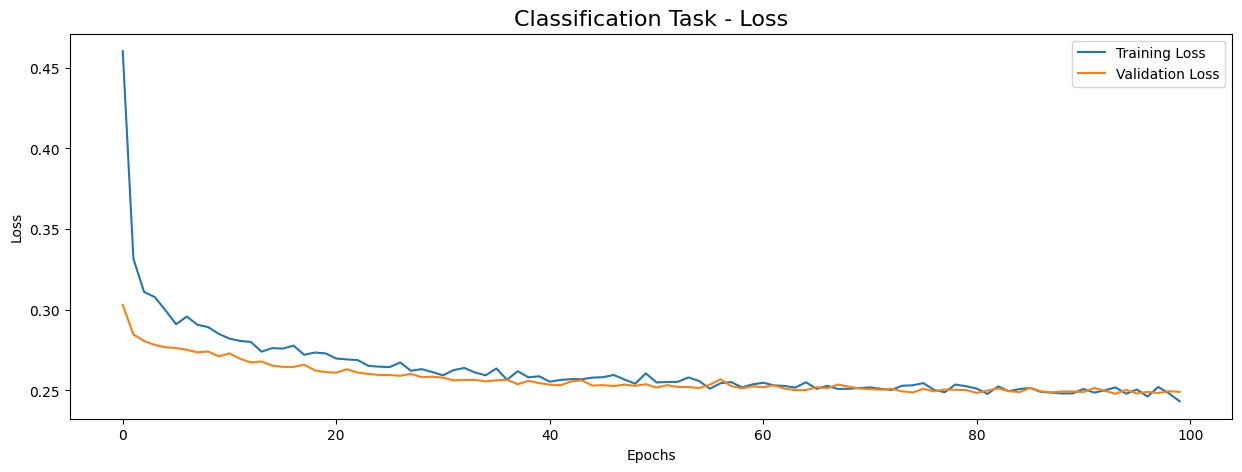

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(history_class_df['loss'], label='Training Loss')
plt.plot(history_class_df['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Classification Task - Loss', fontsize=16)
plt.legend()
plt.show()

### 2.4.2 Accuracy plot for the classification task

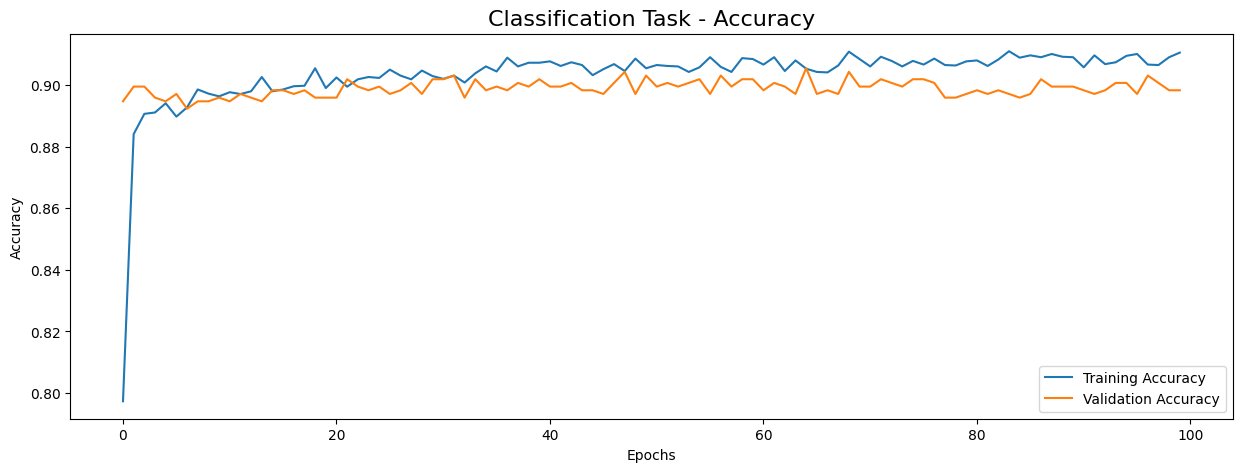

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(history_class_df['accuracy'], label='Training Accuracy')
plt.plot(history_class_df['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Classification Task - Accuracy', fontsize=16)
plt.legend()
plt.show()

## 2.5 prediction

In [ ]:
# select the model when the val_loss is the smallest as the final model
final_class_model = load_model('class_best_model.keras')

# prediction
y_pred_class = (final_class_model.predict(X_test_class) > 0.5).astype(int)
cm = confusion_matrix(y_test_class, y_pred_class)


27/27 [==============================] - 0s 1ms/step


### 2.5.1 Confusion matrix for the test data for the classification task

In [ ]:
def show_cm(X_test, y_test):
    final_class_model = load_model('class_best_model.keras')
    y_pred = (final_class_model.predict(X_test) > 0.5).astype(int)
    cm = confusion_matrix(y_test, y_pred)
    cm_table_data = [
        ["Confusion Matrix", "Positive (Actual)", "Negative (Actual)"],
        ["Positive (Predicted)", cm[0, 0], cm[0, 1]],
        ["Negative (Predicted)", cm[1, 0], cm[1, 1]]
    ]

    cm_table = tabulate(cm_table_data, headers="firstrow", tablefmt="grid")

    print("Confusion matrix for the test data for the classification task.")
    print(cm_table)

show_cm(X_test_class, y_test_class)

27/27 [==============================] - 0s 1ms/step
Confusion matrix for the test data for the classification task.
+----------------------+---------------------+---------------------+
| Confusion Matrix     |   Positive (Actual) |   Negative (Actual) |
+======================+=====================+=====================+
| Positive (Predicted) |                 448 |                  31 |
+----------------------+---------------------+---------------------+
| Negative (Predicted) |                  42 |                 315 |
+----------------------+---------------------+---------------------+


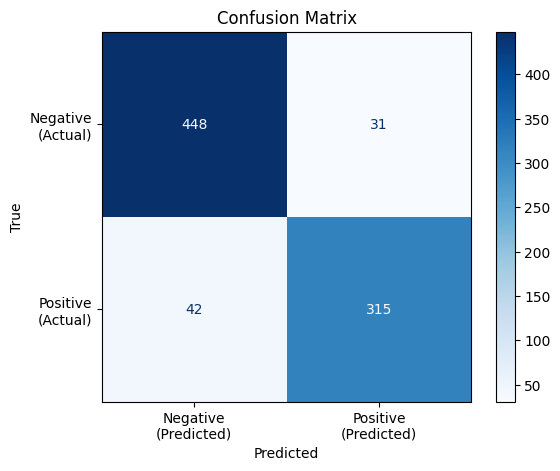

In [ ]:
# show confusion matrix
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
display.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(ticks=[0, 1], labels=['Negative\n(Predicted)', 'Positive\n(Predicted)'])
plt.yticks(ticks=[0, 1], labels=['Negative\n(Actual)', 'Positive\n(Actual)'])
plt.title('Confusion Matrix')

plt.show()

### 2.5.2 Accuracy and precision for the test data for the classification task

In [ ]:
def show_acc_pre(X_test, y_test):
    final_class_model = load_model('class_best_model.keras')
    y_pred = (final_class_model.predict(X_test) > 0.5).astype(int)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    table_data = [
        ["Accuracy", "Precision", "Number of Samples"],
        [f"{accuracy:.0%}", f"{precision:.0%}", X_test.shape[0]]]

    table = tabulate(table_data, headers="firstrow", tablefmt="grid")
    print("Accuracy and precision for the test data for the classification task")
    print(table)

show_acc_pre(X_test_class, y_test_class)

27/27 [==============================] - 0s 1ms/step
Accuracy and precision for the test data for the classification task
+------------+-------------+---------------------+
| Accuracy   | Precision   |   Number of Samples |
+============+=============+=====================+
| 91%        | 91%         |                 836 |
+------------+-------------+---------------------+


# 3. regression task

## 3.1 features processing

### 3.1.1 correlation heatmap

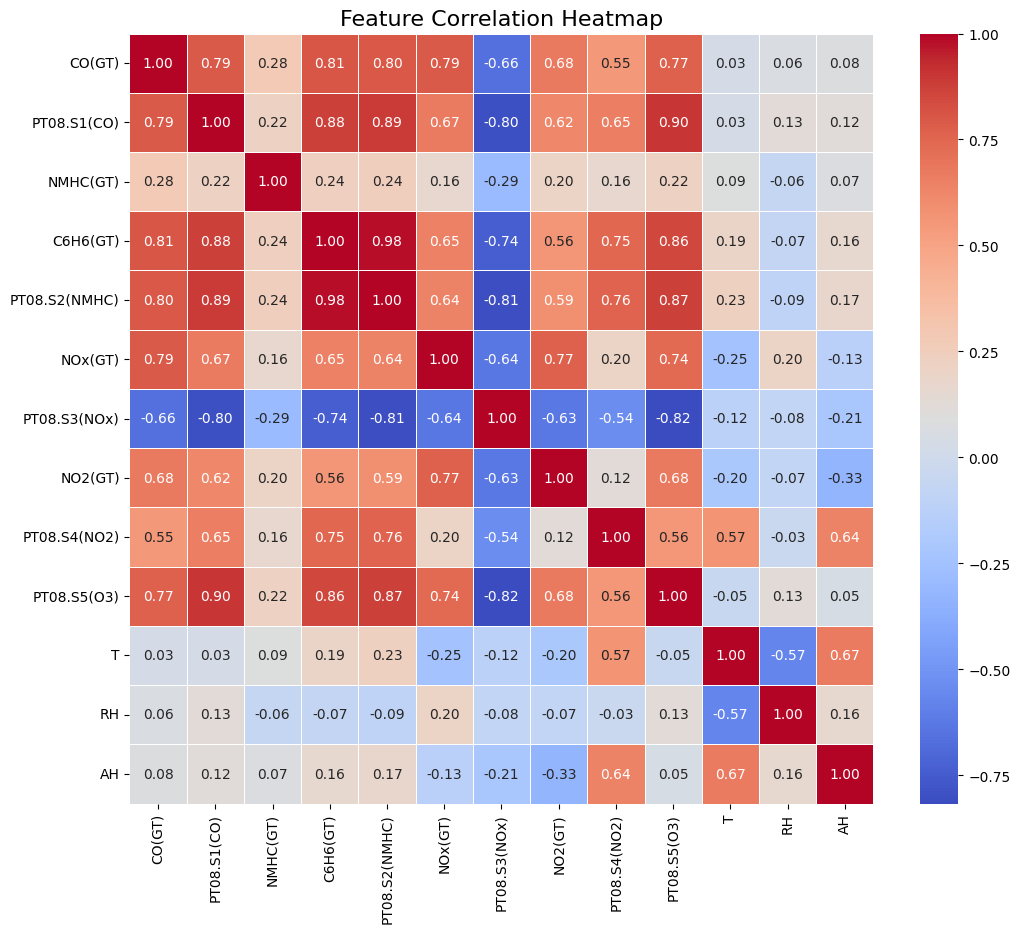

In [ ]:
# only need to get variables from 3rd column to 15th column
variables = df_interpolate.columns[2:15]
feature_correlation = df_interpolate[variables].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(feature_correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, annot_kws={"size": 10})
plt.title('Feature Correlation Heatmap', fontsize=16)

plt.show()

### 3.1.2 feature selection

In [ ]:
# select the features/variables that strongly correlated to the target variable (NOx(GT))
# drop the variable that poorly correlated with the target variable (NOx(GT))
# set a threshold for feature selection as 0.5
# therefore drop all columns with a correlation coefficient value lower than 0.5

drop_columns_reg = ["Date", "Time", "NMHC(GT)", "NOx(GT)", "PT08.S4(NO2)", "PT08.S3(NOx)", "T", "RH", "AH", "CO_label"]

X_reg = df_interpolate.drop(columns=drop_columns_reg)
y_reg = df_interpolate['NOx(GT)']
X_reg

CO(GT)  PT08.S1(CO)   C6H6(GT)  PT08.S2(NMHC)  NO2(GT)  PT08.S5(O3)
0        2.6      1360.00  11.881723        1045.50    113.0      1267.50
1        2.0      1292.25   9.397165         954.75     92.0       972.25
2        2.2      1402.00   8.997817         939.25    114.0      1074.00
3        2.2      1375.50   9.228796         948.25    122.0      1203.25
4        1.6      1272.25   6.518224         835.50    116.0      1110.00
...      ...          ...        ...            ...      ...          ...
8353     1.0       947.75   3.525377         683.75    119.9       599.00
8354     1.0       938.50   3.576895         686.75    122.9       549.50
8355     1.1       924.50   4.045717         713.25    114.9       518.00
8356     1.3       923.75   4.519882         738.75    122.2       540.50
8357     1.0       890.75   3.276734         669.00    110.6       456.25

[8358 rows x 6 columns]

In [ ]:
y_reg

0       166.0
1       103.0
2       131.0
3       172.0
4       131.0
        ...  
8353    180.0
8354    197.1
8355    172.0
8356    183.6
8357    159.9
Name: NOx(GT), Length: 8358, dtype: float64

### 3.1.4 Splitting dataset (train, validation, test)

In [ ]:
train_size = int(0.8*len(df_interpolate))
val_size = int(0.1*len(df_interpolate))
test_size = len(df_interpolate) - train_size - val_size

X_train_reg = X_reg[:train_size]
y_train_reg = y_reg[:train_size]

X_val_reg = X_reg[train_size : (train_size + val_size)]
y_val_reg = y_reg[train_size : (train_size + val_size)]

X_test_reg = X_reg[(train_size + val_size):]
y_test_reg = y_reg[(train_size + val_size):]

print(X_train_reg.shape, y_train_reg.shape)
print(X_val_reg.shape, y_val_reg.shape)
print(X_test_reg.shape, y_test_reg.shape)

(6686, 6) (6686,)
(835, 6) (835,)
(837, 6) (837,)


## 3.2 build model

In [ ]:
# build model
# add regularization to prevent overfitting in neural networks
reg_model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_reg.shape[1],), kernel_regularizer=l2(0.001)),
    Dropout(0.3, seed=42),
    Dense(16, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3, seed=42),
    Dense(1, activation='linear')
])

# compile model
reg_model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mean_absolute_error'])
reg_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                224       
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dropout_3 (Dropout)         (None, 16)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 769 (3.00 KB)
Trainable params: 769 (3.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## 3.3 training

In [ ]:
# save the model with the smallest val_loss
checkpoint = ModelCheckpoint(filepath='reg_best_model.keras',
                             monitor='val_loss', mode='min',
                             save_best_only=True, verbose=1)

history_reg_models = reg_model.fit(X_train_reg, y_train_reg, epochs=100, batch_size=16,
                                   validation_data=(X_val_reg, y_val_reg), callbacks=[checkpoint])

history_reg_df = pd.DataFrame(history_reg_models.history)

Epoch 1/100
405/418 [============================>.] - ETA: 0s - loss: 57887.3281 - mean_absolute_error: 167.8905
Epoch 1: val_loss improved from inf to 37889.85938, saving model to reg_best_model.keras
418/418 [==============================] - 2s 3ms/step - loss: 57128.3945 - mean_absolute_error: 166.5980 - val_loss: 37889.8594 - val_mean_absolute_error: 135.1588
Epoch 2/100
388/418 [==========================>...] - ETA: 0s - loss: 30207.6270 - mean_absolute_error: 122.6352
Epoch 2: val_loss improved from 37889.85938 to 22941.38672, saving model to reg_best_model.keras
418/418 [==============================] - 1s 2ms/step - loss: 30263.1914 - mean_absolute_error: 122.7581 - val_loss: 22941.3867 - val_mean_absolute_error: 106.2171
Epoch 3/100
394/418 [===========================>..] - ETA: 0s - loss: 28053.0254 - mean_absolute_error: 116.2519
Epoch 3: val_loss improved from 22941.38672 to 22158.62109, saving model to reg_best_model.keras
418/418 [==============================] - 1s

## 3.4 validation

### 3.4.1 Loss plot for the regression task

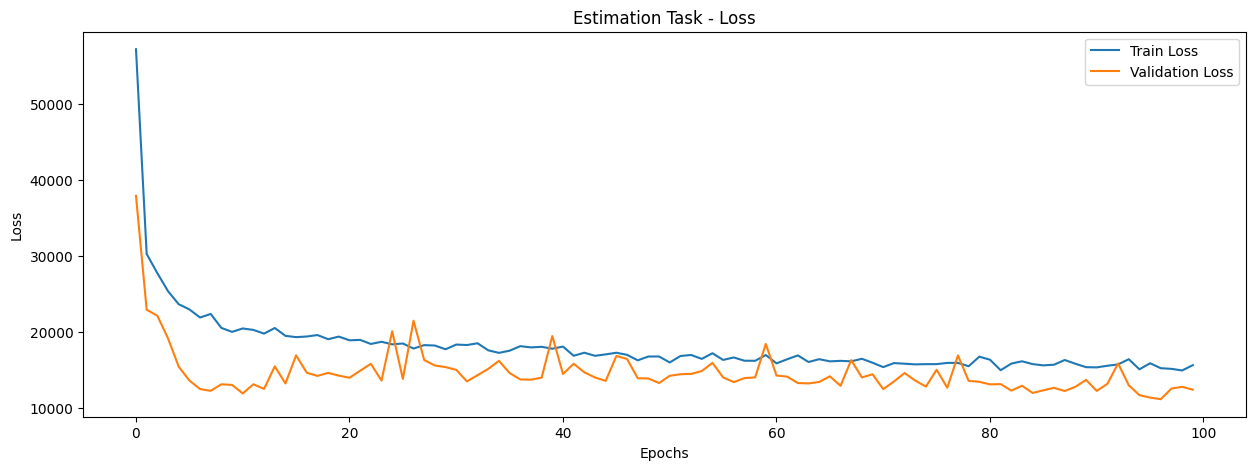

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(history_reg_df['loss'], label='Train Loss')
plt.plot(history_reg_df['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Estimation Task - Loss')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

### 3.4.2 Estimated and actual NOx(GT) for the validation set

27/27 [==============================] - 0s 1ms/step


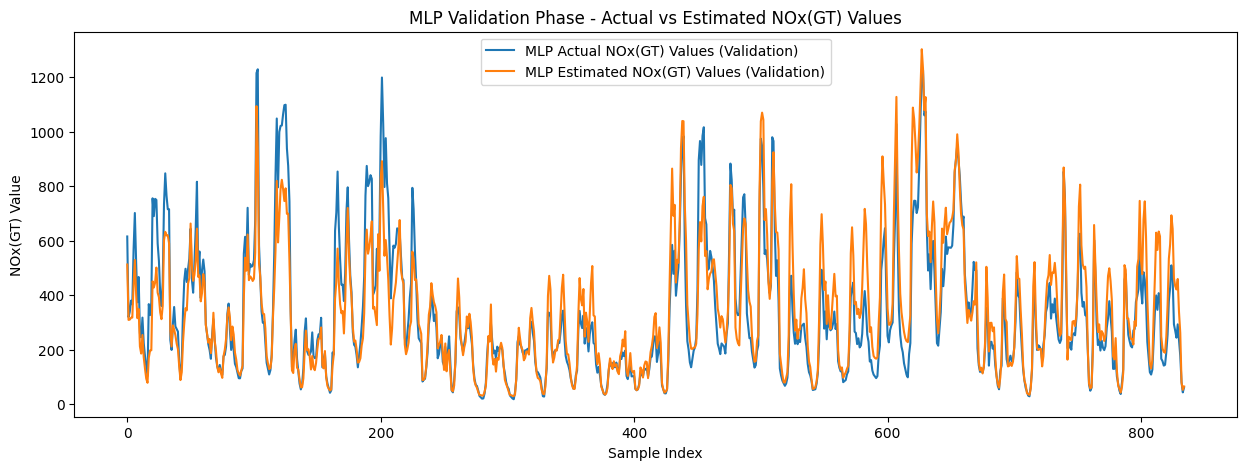

In [ ]:
# select the model with the smallest val_loss
final_reg_model = load_model('reg_best_model.keras')

# predict on X_val
y_val_pred_reg = final_reg_model.predict(X_val_reg)

plt.figure(figsize=(15, 5))
plt.plot(y_val_reg.values, label='MLP Actual NOx(GT) Values (Validation)')
plt.plot(y_val_pred_reg, label='MLP Estimated NOx(GT) Values (Validation)')
plt.xlabel('Sample Index')
plt.ylabel('NOx(GT) Value')
plt.legend()
plt.title('MLP Validation Phase - Actual vs Estimated NOx(GT) Values')
plt.show()

## 3.5 prediction

### RMSE-MAE table (Result table for the test data for the regression task)

In [ ]:
def show_RMSE_MAE(X_test, y_test):
    final_reg_model = load_model('reg_best_model.keras')
    y_test_pred = final_reg_model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    mae = mean_absolute_error(y_test, y_test_pred)

    table_data = [
        ["RMSE", "MAE", "Number of Samples"],
        [f"{rmse:.2f}", f"{mae:.2f}", len(y_test)]]

    table = tabulate(table_data, headers="firstrow", tablefmt="grid")

    print("Result table for the test data for the regression task.")
    print(table)

show_RMSE_MAE(X_test_reg, y_test_reg)

27/27 [==============================] - 0s 1ms/step
Result table for the test data for the regression task.
+--------+-------+---------------------+
|   RMSE |   MAE |   Number of Samples |
+========+=======+=====================+
|  77.82 | 55.79 |                 837 |
+--------+-------+---------------------+


# 4. script of new test dataset for discussion


## 4.1 data processing

In [27]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/dataset_ML/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/dataset_ML


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import math
import joblib
from tabulate import tabulate
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.regularizers import l2
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
from typing_extensions import final
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [29]:

# change file name to "Generalization Dataset.xlsx"
file_test = "Generalization Dataset.xlsx"
df_test = pd.read_excel(file_test)
df_test


Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  \
0   2004-03-11  15:00:00     2.2      1310.00        79   8.826223   
1   2004-03-15  05:00:00     1.0      1074.50        39   3.865914   
2   2004-03-15  06:00:00     1.4      1156.75        51   6.385320   
3   2004-03-15  07:00:00     2.2      1314.00       107   9.685047   
4   2004-03-15  08:00:00     5.5      1796.75       336  25.870458   
..         ...       ...     ...          ...       ...        ...   
867 2005-04-04  10:00:00     3.1      1314.25      -200  13.529605   
868 2005-04-04  11:00:00     2.4      1162.50      -200  11.355157   
869 2005-04-04  12:00:00     2.4      1142.00      -200  12.374538   
870 2005-04-04  13:00:00     2.1      1002.50      -200   9.547187   
871 2005-04-04  14:00:00     2.2      1070.75      -200  11.932060   

     PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0           932.50    184.0       1081.75    126.0       1646.50       946.25   
1           703.25     88.0       1155.75     74.0       1463.75      1010.00   
2           829.50    138.0       1029.50     80.0       1584.00      1083.00   
3           965.75    228.0        896.75     89.0       1710.25      1234.75   
4          1451.00    360.0        652.00    114.0       2323.00      1679.50   
..             ...      ...           ...      ...           ...          ...   
867        1101.25    471.7        538.50    189.8       1374.25      1728.50   
868        1027.00    353.3        603.75    179.2       1263.50      1269.00   
869        1062.50    293.0        603.25    174.7       1240.75      1092.00   
870         960.50    234.5        701.50    155.7       1041.00       769.75   
871        1047.25    265.2        654.00    167.7       1128.50       816.00   

          T         RH        AH  
0     8.325  79.799999  0.877784  
1    11.900  67.449999  0.937538  
2    11.375  70.525000  0.947516  
3    11.325  70.200001  0.940095  
4    12.400  63.875001  0.916955  
..      ...        ...       ...  
867  21.850  29.250000  0.756824  
868  24.325  23.725000  0.711864  
869  26.900  18.350000  0.640649  
870  28.325  13.550000  0.513866  
871  28.500  13.125000  0.502804  

[872 rows x 15 columns]

In [30]:


# replace -200 to NaN for all the missing value
df_test = df_test.replace(-200, np.nan)
threshold = df_test['CO(GT)'].mean()
print(threshold)

# using interpolation to fill the missing data
df_interpolate_new = df_test.interpolate(method='linear', inplace=False)

# add a new column in dataframe (if above threshold -> label 1; if below threshold -> label 0)
df_interpolate_new['CO_label'] = (df_interpolate_new['CO(GT)'] > threshold1).astype(int)

df_interpolate_new



2.2393348623853213


Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  \
0   2004-03-11  15:00:00     2.2      1310.00      79.0   8.826223   
1   2004-03-15  05:00:00     1.0      1074.50      39.0   3.865914   
2   2004-03-15  06:00:00     1.4      1156.75      51.0   6.385320   
3   2004-03-15  07:00:00     2.2      1314.00     107.0   9.685047   
4   2004-03-15  08:00:00     5.5      1796.75     336.0  25.870458   
..         ...       ...     ...          ...       ...        ...   
867 2005-04-04  10:00:00     3.1      1314.25     143.0  13.529605   
868 2005-04-04  11:00:00     2.4      1162.50     143.0  11.355157   
869 2005-04-04  12:00:00     2.4      1142.00     143.0  12.374538   
870 2005-04-04  13:00:00     2.1      1002.50     143.0   9.547187   
871 2005-04-04  14:00:00     2.2      1070.75     143.0  11.932060   

     PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0           932.50    184.0       1081.75    126.0       1646.50       946.25   
1           703.25     88.0       1155.75     74.0       1463.75      1010.00   
2           829.50    138.0       1029.50     80.0       1584.00      1083.00   
3           965.75    228.0        896.75     89.0       1710.25      1234.75   
4          1451.00    360.0        652.00    114.0       2323.00      1679.50   
..             ...      ...           ...      ...           ...          ...   
867        1101.25    471.7        538.50    189.8       1374.25      1728.50   
868        1027.00    353.3        603.75    179.2       1263.50      1269.00   
869        1062.50    293.0        603.25    174.7       1240.75      1092.00   
870         960.50    234.5        701.50    155.7       1041.00       769.75   
871        1047.25    265.2        654.00    167.7       1128.50       816.00   

          T         RH        AH  CO_label  
0     8.325  79.799999  0.877784         1  
1    11.900  67.449999  0.937538         0  
2    11.375  70.525000  0.947516         0  
3    11.325  70.200001  0.940095         1  
4    12.400  63.875001  0.916955         1  
..      ...        ...       ...       ...  
867  21.850  29.250000  0.756824         1  
868  24.325  23.725000  0.711864         1  
869  26.900  18.350000  0.640649         1  
870  28.325  13.550000  0.513866         0  
871  28.500  13.125000  0.502804         1  

[872 rows x 16 columns]

## 4.2 classification task

In [31]:


columns_class = ["PT08.S1(CO)", "C6H6(GT)", "PT08.S2(NMHC)", "NOx(GT)", "NO2(GT)", "PT08.S4(NO2)", "PT08.S5(O3)"]
X_class_test = df_interpolate_new[columns_class]
y_class_test = df_interpolate_new['CO_label']
X_class_test

# standardization
# scaler = joblib.load('scaler.save')
# X_class_test = scaler.transform(X_class_test)
scaler = StandardScaler()
X_class_test = scaler.fit_transform(X_class_test)
X_class_test.shape
X_class_test



array([[ 0.66640693, -0.21874074, -0.08659271, ...,  0.23249381,
         0.56083784, -0.28724353],
       [-0.3377504 , -0.88375394, -0.95965018, ..., -0.99152151,
         0.03210139, -0.12262633],
       [ 0.01295848, -0.545985  , -0.47884972, ..., -0.85028898,
         0.38001142,  0.06587649],
       ...,
       [-0.04993461,  0.25697098,  0.40848896, ...,  1.37883123,
        -0.61308728,  0.08911656],
       [-0.64475392, -0.12208333,  0.02004027, ...,  0.93159487,
        -1.19100852, -0.7430072 ],
       [-0.35374017,  0.19764925,  0.35041207, ...,  1.21405994,
        -0.93785153, -0.62357904]])

In [32]:


# Confusion matrix
def show_cm(X_test, y_test):
    final_class_model = load_model('class_best_model.keras')
    y_pred = (final_class_model.predict(X_test) > 0.5).astype(int)
    cm = confusion_matrix(y_test, y_pred)
    cm_table_data = [
        ["Confusion Matrix", "Positive (Actual)", "Negative (Actual)"],
        ["Positive (Predicted)", cm[0, 0], cm[0, 1]],
        ["Negative (Predicted)", cm[1, 0], cm[1, 1]]
    ]

    cm_table = tabulate(cm_table_data, headers="firstrow", tablefmt="grid")

    print("Confusion matrix for the test data for the classification task.")
    print(cm_table)

show_cm(X_class_test, y_class_test)



28/28 [==============================] - 0s 1ms/step
Confusion matrix for the test data for the classification task.
+----------------------+---------------------+---------------------+
| Confusion Matrix     |   Positive (Actual) |   Negative (Actual) |
+======================+=====================+=====================+
| Positive (Predicted) |                 489 |                  17 |
+----------------------+---------------------+---------------------+
| Negative (Predicted) |                  42 |                 324 |
+----------------------+---------------------+---------------------+


In [33]:


# Accuracy and precision
def show_acc_pre(X_test, y_test):
    final_class_model = load_model('class_best_model.keras')
    y_pred = (final_class_model.predict(X_test) > 0.5).astype(int)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    table_data = [
        ["Accuracy", "Precision", "Number of Samples"],
        [f"{accuracy:.0%}", f"{precision:.0%}", X_test.shape[0]]]

    table = tabulate(table_data, headers="firstrow", tablefmt="grid")
    print("Accuracy and precision for the test data for the classification task")
    print(table)

show_acc_pre(X_class_test, y_class_test)



28/28 [==============================] - 0s 2ms/step
Accuracy and precision for the test data for the classification task
+------------+-------------+---------------------+
| Accuracy   | Precision   |   Number of Samples |
+============+=============+=====================+
| 93%        | 95%         |                 872 |
+------------+-------------+---------------------+


## 4.3 regression task

In [34]:


columns_reg = ["CO(GT)",	"PT08.S1(CO)",	"C6H6(GT)",	"PT08.S2(NMHC)",	"NO2(GT)",	"PT08.S5(O3)"]

X_reg_test = df_interpolate_new[columns_reg]
y_reg_test = df_interpolate_new['NOx(GT)']



In [35]:


def show_RMSE_MAE(X_test, y_test):
    final_reg_model = load_model('reg_best_model.keras')
    y_test_pred = final_reg_model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    mae = mean_absolute_error(y_test, y_test_pred)

    table_data = [
        ["RMSE", "MAE", "Number of Samples"],
        [f"{rmse:.2f}", f"{mae:.2f}", len(y_test)]]

    table = tabulate(table_data, headers="firstrow", tablefmt="grid")

    print("Result table for the test data for the regression task.")
    print(table)

show_RMSE_MAE(X_reg_test, y_reg_test)


28/28 [==============================] - 0s 1ms/step
Result table for the test data for the regression task.
+--------+-------+---------------------+
|   RMSE |   MAE |   Number of Samples |
+========+=======+=====================+
| 124.45 | 83.36 |                 872 |
+--------+-------+---------------------+
